In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Research Question**: 
"What are the patterns and trends in age-specific fertility rates across different regions, and how do these rates vary by age group and location?"

1. **Index**: An index or identifier for each data entry, likely serving as a unique identifier for rows.

2. **Variant**: The variant or scenario associated with the data. In demographic analysis, "variants" often represent different projections or scenarios for future population trends, such as high, medium, or low projections.

3. **Region, Subregion, Country or Area**: This column likely contains the names of regions, subregions, countries, or specific areas to which the fertility rate data applies. It provides the geographical context for the data.

4. **Notes**: Notes or comments related to the data, including disclaimers, designations, and explanations provided by the data source (United Nations).

5. **Location Code**: A numerical or alphanumeric code that uniquely identifies each geographical location. This code can be used for reference and linking to other datasets.

6. **ISO3 Alpha-code**: The ISO 3166-1 alpha-3 code for the location, which is a standardized three-letter code representing countries and significant geographic areas.

7. **ISO2 Alpha-code**: The ISO 3166-1 alpha-2 code for the location, which is a two-letter code representing countries and territories.

8. **SDMX Code**: A code used for data exchange and interoperability, likely conforming to the SDMX (Statistical Data and Metadata Exchange) standard.

9. **Type**: The type of data or category to which the data belongs. This may indicate that the data are fertility rates.

10. **Parent Code**: A code that possibly identifies the parent or overarching category to which the data relate. This may be used for hierarchical grouping.

11. **Year**: The year associated with the fertility rate data, indicating the specific time period for which the rates are reported.

12. **Columns 15-49**: These columns appear to represent age-specific fertility rates by single age (births per 1,000 women). Each column corresponds to a specific age group, and the values in these columns likely represent the fertility rates for women in those age groups.

In [2]:
df = pd.read_csv('Number_of births.csv', encoding='latin1')
df.head()

Index    Variant Region, subregion, country or area * Notes  Location code  \
0      1  Estimates                                WORLD   NaN            900   
1      2  Estimates                                WORLD   NaN            900   
2      3  Estimates                                WORLD   NaN            900   
3      4  Estimates                                WORLD   NaN            900   
4      5  Estimates                                WORLD   NaN            900   

  ISO3 Alpha-code ISO2 Alpha-code  SDMX code**   Type  Parent code  ...  \
0             NaN             NaN          1.0  World            0  ...   
1             NaN             NaN          1.0  World            0  ...   
2             NaN             NaN          1.0  World            0  ...   
3             NaN             NaN          1.0  World            0  ...   
4             NaN             NaN          1.0  World            0  ...   

      40     41     42     43     44     45     46     47    48    49  
0  93.28  78.57  63.02  48.44  35.70  25.44  17.57  11.95  8.29  5.19  
1  90.98  76.77  61.74  47.36  34.93  25.03  17.38  11.90  8.22  5.13  
2  95.38  80.89  65.70  50.77  37.41  26.96  18.77  12.86  8.92  5.51  
3  92.52  77.24  62.27  48.29  35.71  25.63  17.97  12.42  8.63  5.38  
4  95.37  79.08  62.99  48.69  36.22  26.08  18.24  12.66  8.81  5.47  

[5 rows x 46 columns]

In [3]:
df.shape

(20524, 46)

In [4]:
summary_statistics = df.iloc[:, 4:50].describe()

# Display the summary statistics
print(summary_statistics)

       Location code   SDMX code**   Parent code          Year
count   20524.000000  20232.000000  20524.000000  20520.000000
mean      598.518466    410.352313   1218.695771   1985.500000
std       566.611380    269.283425   1006.221303     20.783111
min         4.000000      1.000000      0.000000   1950.000000
25%       266.000000    158.000000    913.000000   1967.750000
50%       531.000000    417.000000    922.000000   1985.500000
75%       792.000000    643.000000    931.000000   2003.250000
max      5501.000000    914.000000   5501.000000   2021.000000


In [5]:
df.rename(columns={"ISO3 Alpha-code": "Country-Code"}, inplace=True)

In [6]:
df.rename(columns={"Region, subregion, country or area *": "Country-Name"}, inplace=True)

In [7]:
df.head()

Index    Variant Country-Name Notes  Location code Country-Code  \
0      1  Estimates        WORLD   NaN            900          NaN   
1      2  Estimates        WORLD   NaN            900          NaN   
2      3  Estimates        WORLD   NaN            900          NaN   
3      4  Estimates        WORLD   NaN            900          NaN   
4      5  Estimates        WORLD   NaN            900          NaN   

  ISO2 Alpha-code  SDMX code**   Type  Parent code  ...     40     41     42  \
0             NaN          1.0  World            0  ...  93.28  78.57  63.02   
1             NaN          1.0  World            0  ...  90.98  76.77  61.74   
2             NaN          1.0  World            0  ...  95.38  80.89  65.70   
3             NaN          1.0  World            0  ...  92.52  77.24  62.27   
4             NaN          1.0  World            0  ...  95.37  79.08  62.99   

      43     44     45     46     47    48    49  
0  48.44  35.70  25.44  17.57  11.95  8.29  5.19  
1  47.36  34.93  25.03  17.38  11.90  8.22  5.13  
2  50.77  37.41  26.96  18.77  12.86  8.92  5.51  
3  48.29  35.71  25.63  17.97  12.42  8.63  5.38  
4  48.69  36.22  26.08  18.24  12.66  8.81  5.47  

[5 rows x 46 columns]

In [8]:
df.drop(['Index','Notes', 'Variant', 'Type', 'Location code','ISO2 Alpha-code', 'SDMX code**', 'Parent code'], axis=1, inplace=True)

df.dropna(subset=['Year'], inplace=True)

In [9]:
df.head()

Country-Name Country-Code    Year     15     16     17      18      19  \
0        WORLD          NaN  1950.0  30.81  56.11  88.05  125.43  160.67   
1        WORLD          NaN  1951.0  30.96  55.59  87.57  125.79  161.55   
2        WORLD          NaN  1952.0  30.99  55.74  89.72  130.07  168.60   
3        WORLD          NaN  1953.0  31.52  56.17  87.29  126.32  164.64   
4        WORLD          NaN  1954.0  32.09  56.58  88.27  127.40  166.36   

       20      21  ...     40     41     42     43     44     45     46  \
0  193.05  218.22  ...  93.28  78.57  63.02  48.44  35.70  25.44  17.57   
1  193.33  218.31  ...  90.98  76.77  61.74  47.36  34.93  25.03  17.38   
2  201.31  226.37  ...  95.38  80.89  65.70  50.77  37.41  26.96  18.77   
3  199.83  225.18  ...  92.52  77.24  62.27  48.29  35.71  25.63  17.97   
4  202.61  229.71  ...  95.37  79.08  62.99  48.69  36.22  26.08  18.24   

      47    48    49  
0  11.95  8.29  5.19  
1  11.90  8.22  5.13  
2  12.86  8.92  5.51  
3  12.42  8.63  5.38  
4  12.66  8.81  5.47  

[5 rows x 38 columns]

In [10]:
df['Country-Name'].unique()

array(['WORLD', 'Sub-Saharan Africa', 'Northern Africa and Western Asia',
       'Central and Southern Asia', 'Eastern and South-Eastern Asia',
       'Latin America and the Caribbean',
       'Oceania (excluding Australia and New Zealand)',
       'Australia/New Zealand', 'Europe and Northern America',
       'More developed regions', 'Less developed regions',
       'Least developed countries',
       'Less developed regions, excluding least developed countries',
       'Less developed regions, excluding China',
       'Land-locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)', 'High-income countries',
       'Middle-income countries', 'Upper-middle-income countries',
       'Lower-middle-income countries', 'Low-income countries',
       'No income group available', 'AFRICA', 'Eastern Africa', 'Burundi',
       'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya',
       'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique',
       'Réunion', 'R

In [11]:
df.isnull().sum()

Country-Name       0
Country-Code    3528
Year               0
15                 0
16                 0
17                 0
18                 0
19                 0
20                 0
21                 0
22                 0
23                 0
24                 0
25                 0
26                 0
27                 0
28                 0
29                 0
30                 0
31                 0
32                 0
33                 0
34                 0
35                 0
36                 0
37                 0
38                 0
39                 0
40                 0
41                 0
42                 0
43                 0
44                 0
45                 0
46                 0
47                 0
48                 0
49                 0
dtype: int64

In [12]:
df[df['Country-Name']=='Djibouti']

Country-Name Country-Code    Year     15     16     17      18      19  \
1876     Djibouti          DJI  1950.0  37.92  60.67  85.15  110.63  137.76   
1877     Djibouti          DJI  1951.0  37.06  59.43  83.76  109.34  136.73   
1878     Djibouti          DJI  1952.0  37.13  59.56  83.94  109.56  136.92   
1879     Djibouti          DJI  1953.0  36.88  58.99  83.06  108.43  135.68   
1880     Djibouti          DJI  1954.0  36.09  57.84  81.57  106.64  133.67   
...           ...          ...     ...    ...    ...    ...     ...     ...   
1943     Djibouti          DJI  2017.0   9.00  16.40  23.68   30.44   37.47   
1944     Djibouti          DJI  2018.0   8.85  16.10  23.25   29.91   36.88   
1945     Djibouti          DJI  2019.0   8.70  15.91  23.13   29.98   37.19   
1946     Djibouti          DJI  2020.0   8.84  16.06  23.17   29.76   36.68   
1947     Djibouti          DJI  2021.0   8.79  15.94  22.98   29.52   36.36   

          20      21  ...      40      41      42      43     44     45  \
1876  166.17  191.72  ...  178.63  157.30  133.82  112.87  95.22  79.44   
1877  165.49  191.30  ...  179.30  157.76  134.01  112.78  94.82  78.83   
1878  165.54  191.06  ...  178.94  157.79  134.28  113.19  95.32  79.32   
1879  164.34  189.95  ...  179.15  157.77  134.32  113.52  96.08  80.45   
1880  162.24  188.15  ...  178.77  157.25  133.87  113.27  96.12  80.75   
...      ...     ...  ...     ...     ...     ...     ...    ...    ...   
1943   45.62   57.77  ...   73.76   57.32   42.98   31.63  23.28  17.18   
1944   45.00   57.09  ...   72.21   55.93   41.79   30.62  22.43  16.47   
1945   45.51   57.61  ...   71.00   55.03   41.10   30.04  21.87  15.91   
1946   44.74   56.80  ...   69.46   53.56   39.78   28.88  20.89  15.10   
1947   44.33   56.24  ...   67.68   51.94   38.38   27.70  19.91  14.31   

         46     47     48     49  
1876  65.29  53.06  41.98  28.46  
1877  64.54  52.28  41.28  27.95  
1878  64.98  52.65  41.58  28.16  
1879  66.35  54.08  42.89  29.12  
1880  66.83  54.66  43.46  29.55  
...     ...    ...    ...    ...  
1943  12.95   9.76   7.24   4.59  
1944  12.37   9.29   6.87   4.34  
1945  11.82   8.78   6.43   4.04  
1946  11.19   8.29   6.05   3.78  
1947  10.57   7.80   5.67   3.52  

[72 rows x 38 columns]

In [13]:
# Drop rows with null values in the "Country Code" column
df.dropna(subset=['Country-Code'], inplace=True)

In [14]:
df.isnull().sum().any()

False

In [15]:
# Convert selected columns to float type
df[df.columns[4:50]] = df[df.columns[4:50]].astype(float)

In [16]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '')

In [17]:
df.columns

Index(['Country-Name', 'Country-Code', 'Year', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49'],
      dtype='object')

In [18]:
categorical_columns = ["Country-Name"]
df[categorical_columns] = df[categorical_columns].astype("category")

In [19]:
# Count the number of duplicate rows in 'df'
num_duplicates = df.duplicated().sum()

# Print the number of duplicates
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [20]:
import scipy.stats as stats

print('Null hypothesis H0: The sample has a normal distribution (Gaussian).')
print('Alternative hypothesis H1: The sample does not have a normal distribution (not Gaussian).')

# Specify the column indices you want to test
columns_to_test = df.columns[4:50]

for col in columns_to_test:
    shapiro_test = stats.shapiro(df[col].dropna())  # Remove null values for the Shapiro-Wilk test
    print('For the variable', col, 'with a p-value of', shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print('We cannot reject the null hypothesis, it is Gaussian.')
    else:
        print('We can reject the null hypothesis, it is not Gaussian.')


Null hypothesis H0: The sample has a normal distribution (Gaussian).
Alternative hypothesis H1: The sample does not have a normal distribution (not Gaussian).
For the variable 16 with a p-value of 0.0
We can reject the null hypothesis, it is not Gaussian.
For the variable 17 with a p-value of 0.0
We can reject the null hypothesis, it is not Gaussian.
For the variable 18 with a p-value of 0.0
We can reject the null hypothesis, it is not Gaussian.
For the variable 19 with a p-value of 0.0
We can reject the null hypothesis, it is not Gaussian.
For the variable 20 with a p-value of 5.605193857299268e-45
We can reject the null hypothesis, it is not Gaussian.
For the variable 21 with a p-value of 8.407790785948902e-45
We can reject the null hypothesis, it is not Gaussian.
For the variable 22 with a p-value of 9.80908925027372e-45
We can reject the null hypothesis, it is not Gaussian.
For the variable 23 with a p-value of 3.783505853677006e-44
We can reject the null hypothesis, it is not Gaus

In [21]:
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3 - q1
   lower_bound = q1 - 1.5 * IQR
   upper_bound = q3 + 1.5 * IQR
   outliers = (df < lower_bound) | (df > upper_bound)
   return outliers

columns = df.columns[4:50]

outliers = find_outliers_IQR(df[columns])

# Count the number of outliers for each column and sum them up
num_outliers = outliers.sum().sum()

# Find the maximum and minimum outlier values for each column
max_outlier_values = df[columns][outliers].max()
min_outlier_values = df[columns][outliers].min()

print("Number of outliers: " + str(num_outliers))
print("Maximum outlier values:")
print(max_outlier_values)
print("Minimum outlier values:")
print(min_outlier_values)

Number of outliers: 3358
Maximum outlier values:
16    255.97
17    295.31
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41    244.85
42    214.56
43    183.51
44    171.93
45    158.04
46    141.19
47    122.71
48    101.40
49     70.60
dtype: float64
Minimum outlier values:
16    174.63
17    246.36
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41    234.35
42    193.08
43    156.82
44    124.11
45     95.28
46     73.13
47     54.85
48     40.86
49     26.47
dtype: float64


In [22]:
summary_statistics = df.iloc[:, 4:50].describe()

# Display the summary statistics
print(summary_statistics)

                 16            17            18            19            20  \
count  16992.000000  16992.000000  16992.000000  16992.000000  16992.000000   
mean      47.558642     73.313472    103.050229    131.900855    157.550537   
std       45.238377     58.906399     68.997141     75.734469     81.098740   
min        0.000000      0.000000      0.000000      0.200000      0.730000   
25%        9.100000     23.270000     45.490000     69.347500     90.717500   
50%       34.640000     58.970000     89.570000    124.320000    155.580000   
75%       75.262500    112.250000    152.015000    189.115000    223.432500   
max      255.970000    295.310000    305.070000    342.100000    404.490000   

                 21            22            23            24            25  \
count  16992.000000  16992.000000  16992.000000  16992.000000  16992.000000   
mean     176.960534    190.604586    199.724883    204.923726    206.718988   
std       85.468496     87.620366     88.321816    

In [23]:
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3 - q1
   outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
   return outliers

# Select the numeric columns from 15 to 49
columns = df.columns[4:50]

outliers = find_outliers_IQR(df[columns])

# Get the number of outliers
num_outliers = outliers.count()

# Get the maximum and minimum outlier values
max_outliers = outliers.max()
min_outliers = outliers.min()

# Print the column names with outliers
columns_with_outliers = num_outliers[num_outliers > 0].index.tolist()
print("Columns with outliers:", columns_with_outliers)

print("Number of outliers:", num_outliers)
print("Maximum outlier values:")
print(max_outliers)
print("Minimum outlier values:")
print(min_outliers)

Columns with outliers: ['16', '17', '41', '42', '43', '44', '45', '46', '47', '48', '49']
Number of outliers: 16    189
17     69
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41     13
42     33
43     72
44    117
45    217
46    401
47    608
48    765
49    874
dtype: int64
Maximum outlier values:
16    255.97
17    295.31
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41    244.85
42    214.56
43    183.51
44    171.93
45    158.04
46    141.19
47    122.71
48    101.40
49     70.60
dtype: float64
Minimum outlier values:
16    174.63
17    246.36
18    

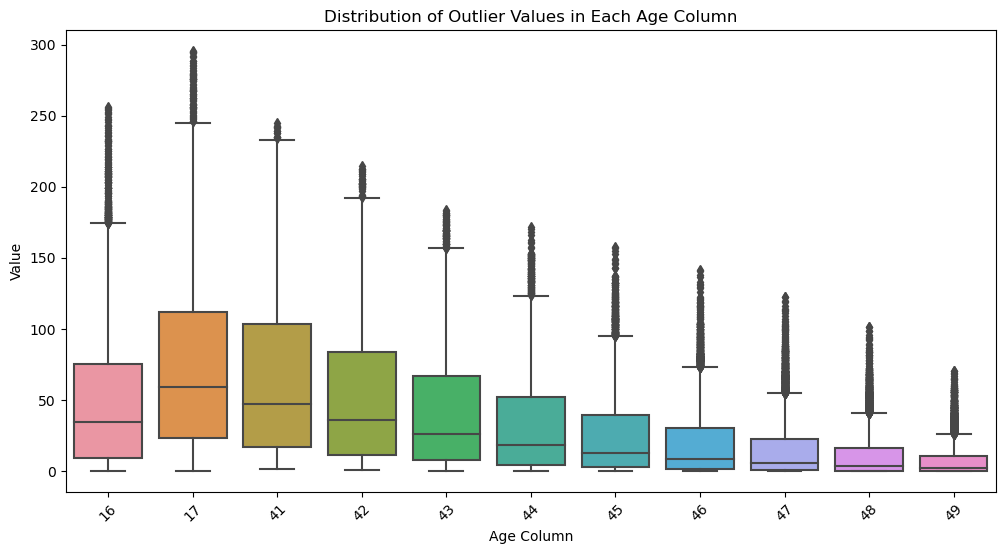

In [24]:
# Select the columns with outliers
outlier_columns = df[['15', '16', '17', '41', '42', '43', '44', '45', '46', '47', '48', '49']]

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=outlier_columns)
plt.title('Distribution of Outlier Values in Each Age Column')
plt.xlabel('Age Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

There is approximately a 50% decrease in the fertility rate of unselected women attempting pregnancy at age 40 or older compared with younger women and a two to three fold increased rate of spontaneous abortion.

In [25]:
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3 - q1
   outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
   return outliers

# Select the numeric columns from 15 to 49
columns = df.columns[4:50]

outliers = find_outliers_IQR(df[columns])

# Get the number of outliers
num_outliers = outliers.count()

# Get the columns without outliers
columns_without_outliers = num_outliers[num_outliers == 0].index.tolist()
print("Columns without outliers:", columns_without_outliers)

Columns without outliers: ['18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']


In [26]:
from sklearn import preprocessing

# Create a RobustScaler instance
trans = preprocessing.RobustScaler()

# Define columns with outliers
outlier_columns = ['15', '16', '17','41', '42', '43', '44', '45', '46', '47', '48', '49']

# Apply RobustScaler to columns with outliers
df[outlier_columns] = trans.fit_transform(df[outlier_columns])

# Display the DataFrame
print(df.head())

     Country-Name Country-Code    Year        15        16        17      18  \
1732      Burundi          BDI  1950.0  0.402122  0.366673  0.366936  131.02   
1733      Burundi          BDI  1951.0  0.395382  0.361836  0.363790  130.84   
1734      Burundi          BDI  1952.0  0.373916  0.341432  0.344235  128.89   
1735      Burundi          BDI  1953.0  0.364181  0.332061  0.336930  128.47   
1736      Burundi          BDI  1954.0  0.371170  0.340979  0.344235  128.86   

          19      20      21  ...      40        41        42        43  \
1732  172.80  214.35  245.95  ...  211.20  1.646091  1.733153  1.755989   
1733  172.71  214.32  245.88  ...  211.83  1.655069  1.742701  1.763193   
1734  170.80  212.66  244.61  ...  212.28  1.660940  1.749896  1.771402   
1735  170.79  213.18  245.44  ...  212.53  1.663242  1.751833  1.773078   
1736  170.69  212.47  244.55  ...  213.90  1.677861  1.766224  1.784972   

            44        45        46        47        48        49  
1

In [27]:
# Calculate medians for the specified columns
medians = df[['15', '16', '17','41', '42', '43', '44', '45', '46', '47', '48', '49']].median()

# Calculate IQRs for the specified columns
iqrs = (df[['15', '16', '17','41', '42', '43', '44', '45', '46', '47', '48', '49']].quantile(0.75) - df[['15', '16', '17','41', '42', '43', '44', '45', '46', '47', '48', '49']].quantile(0.25))

# Check if medians are close to 0 and IQRs are close to 1
median_check = np.isclose(medians, 0.0)
iqr_check = np.isclose(iqrs, 1.0)

# Check if RobustScaler is applied correctly
if median_check.all() and iqr_check.all():
    print("RobustScaler is applied correctly.")
else:
    print("RobustScaler is not applied correctly.")


RobustScaler is applied correctly.


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Define the columns to scale
columns_to_scale = ['18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']

# Apply MinMaxScaler to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the DataFrame
print(df.head())


     Country-Name Country-Code    Year        15        16        17  \
1732      Burundi          BDI  1950.0  0.402122  0.366673  0.366936   
1733      Burundi          BDI  1951.0  0.395382  0.361836  0.363790   
1734      Burundi          BDI  1952.0  0.373916  0.341432  0.344235   
1735      Burundi          BDI  1953.0  0.364181  0.332061  0.336930   
1736      Burundi          BDI  1954.0  0.371170  0.340979  0.344235   

            18        19        20        21  ...        40        41  \
1732  0.429475  0.504826  0.529077  0.550857  ...  0.794113  1.646091   
1733  0.428885  0.504563  0.529002  0.550698  ...  0.796503  1.655069   
1734  0.422493  0.498976  0.524891  0.547812  ...  0.798210  1.660940   
1735  0.421116  0.498947  0.526179  0.549698  ...  0.799158  1.663242   
1736  0.422395  0.498655  0.524420  0.547675  ...  0.804354  1.677861   

            42        43        44        45        46        47        48  \
1732  1.733153  1.755989  1.744036  1.700561  1.59

In [29]:
# Create a MinMaxScaler object

scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Check the scaling results
min_value = np.min(df[columns_to_scale])
max_value = np.max(df[columns_to_scale])

if min_value >= 0.0 and max_value <= 1.0:
    print("MinMaxScaler is applied correctly.")
else:
    print("MinMaxScaler is not applied correctly.")


MinMaxScaler is applied correctly.


In [30]:
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3 - q1
   lower_bound = q1 - 1.5 * IQR
   upper_bound = q3 + 1.5 * IQR
   outliers = (df < lower_bound) | (df > upper_bound)
   return outliers

columns = df.columns[4:50]

outliers = find_outliers_IQR(df[columns])

# Count the number of outliers for each column and sum them up
num_outliers = outliers.sum().sum()

# Find the maximum and minimum outlier values for each column
max_outlier_values = df[columns][outliers].max()
min_outlier_values = df[columns][outliers].min()

print("Number of outliers: " + str(num_outliers))
print("Maximum outlier values:")
print(max_outlier_values)
print("Minimum outlier values:")
print(min_outlier_values)

Number of outliers: 3358
Maximum outlier values:
16    3.345248
17    2.656102
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41    2.277130
42    2.472741
43    2.637712
44    3.222566
45    3.930951
46    4.642252
47    5.425658
48    6.042408
49    6.513687
dtype: float64
Minimum outlier values:
16    2.115851
17    2.105979
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41    2.156263
42    2.1755

# Niger

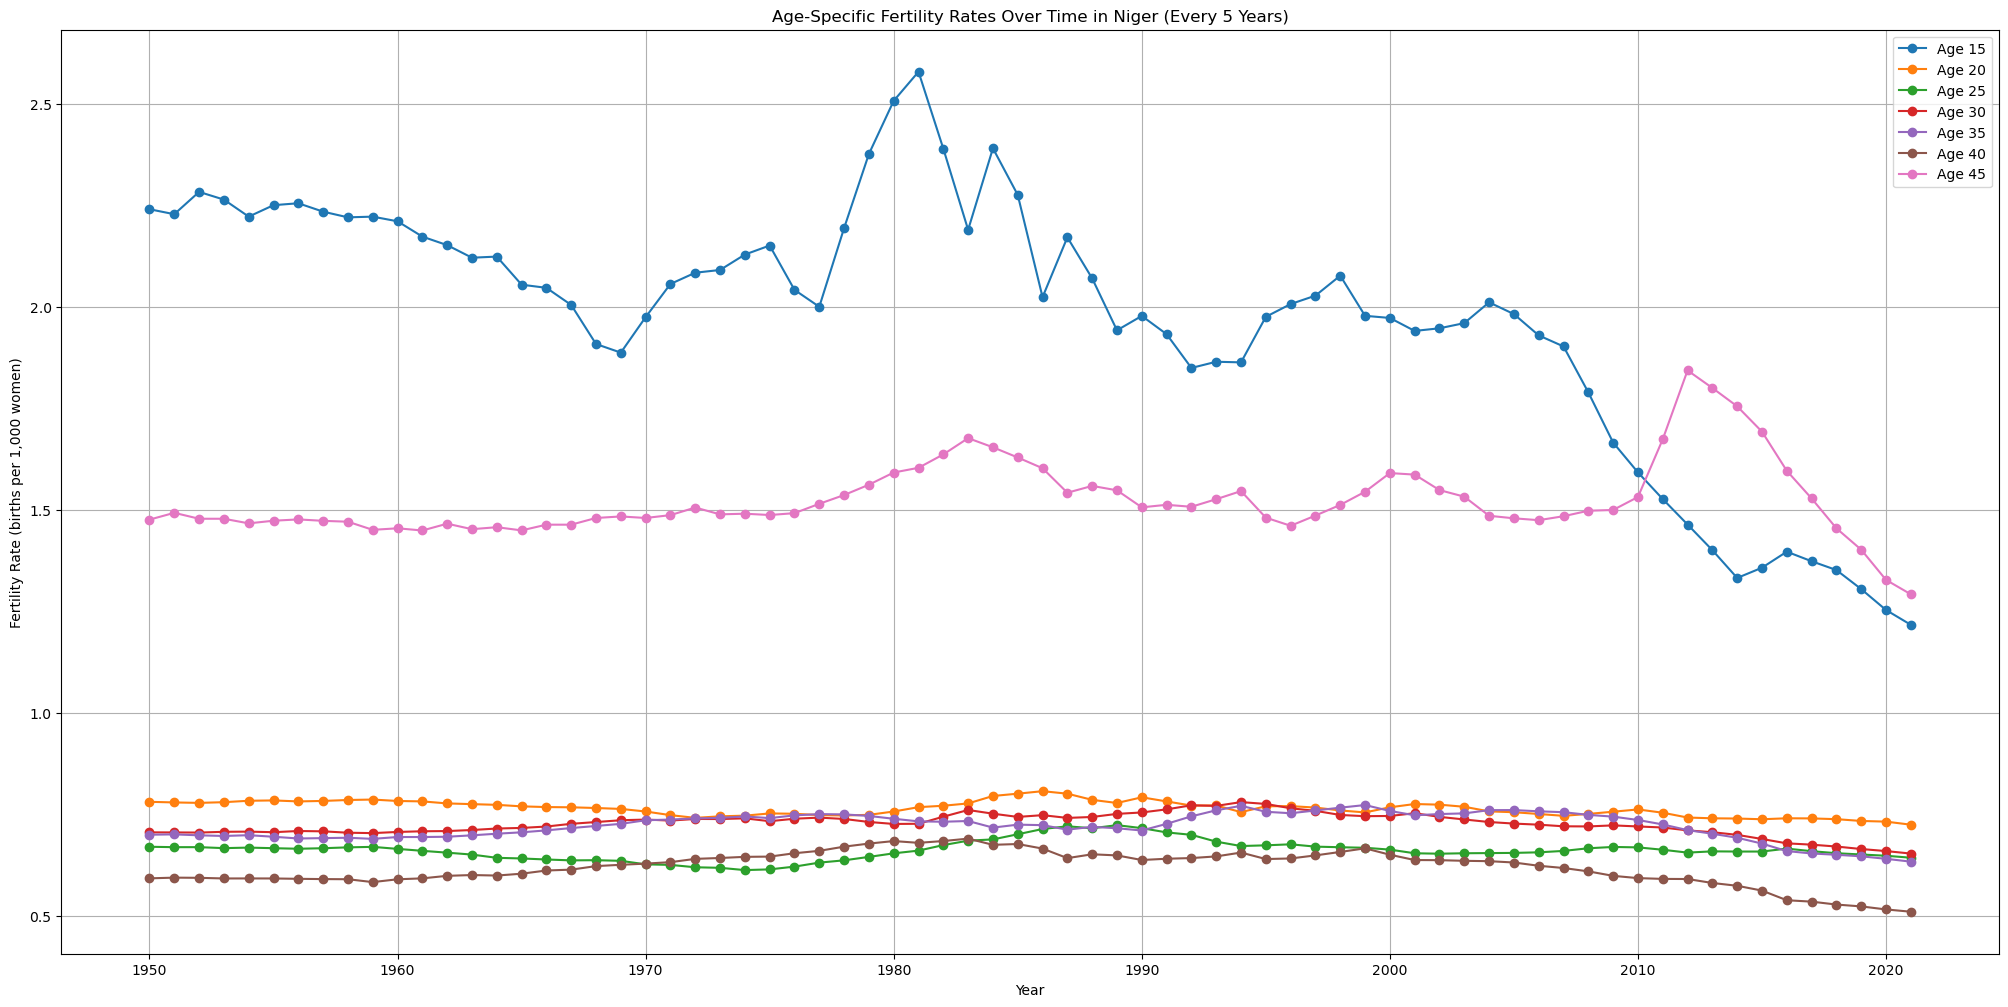

In [31]:
# Specify the age groups you want to visualize (every five years)
age_groups = [str(age) for age in range(15, 50, 5)]

# Select a specific country or region (e.g., Spain in this example)
country_data = df[df['Country-Name'] == 'Niger']

# Extract the year column
years = country_data['Year']

# Extract the fertility rate data for the selected age groups
fertility_rates = country_data[age_groups]

# Create a line plot
plt.figure(figsize=(25, 12))
for age in age_groups:
    plt.plot(years, fertility_rates[age], label=f'Age {age}', marker='o')

plt.xlabel('Year')
plt.ylabel('Fertility Rate (births per 1,000 women)')
plt.title('Age-Specific Fertility Rates Over Time in Niger (Every 5 Years)')
plt.legend()
plt.grid(True)
plt.show()


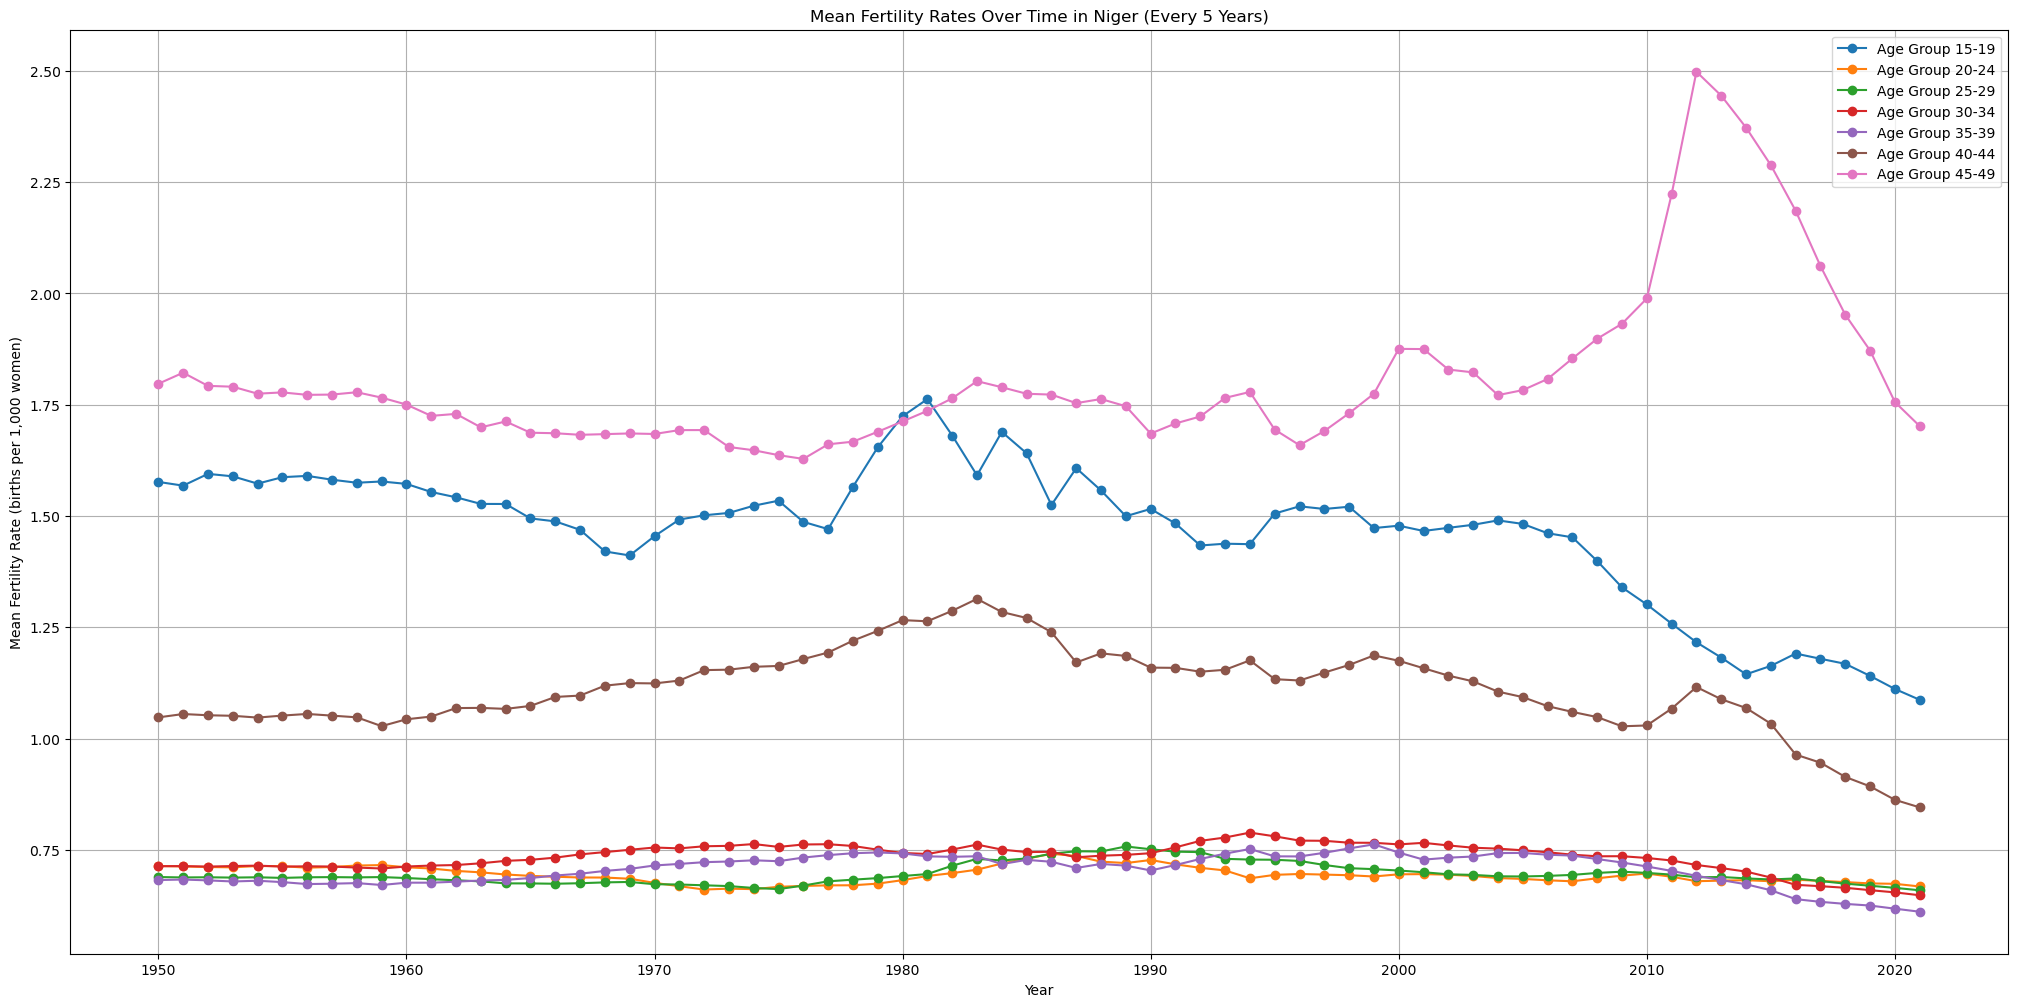

In [32]:
# Specify the age groups you want to visualize (every five years)
age_group_start_years = range(15, 50, 5)
age_group_labels = [f'{start}-{start+4}' for start in age_group_start_years]

# Select a specific country or region (e.g., Spain in this example)
country_data = df[df['Country-Name'] == 'Niger']

# Extract the year column
years = country_data['Year']

# Initialize an empty list to store the mean fertility rates for each age group
mean_fertility_rates = []

# Calculate the mean fertility rate for each age group
for start in age_group_start_years:
    age_group_columns = [str(age) for age in range(start, start + 5)]
    mean_fertility_rate = country_data[age_group_columns].mean(axis=1)
    mean_fertility_rates.append(mean_fertility_rate)

# Create a line plot
plt.figure(figsize=(25, 12))
for i, age_group_label in enumerate(age_group_labels):
    plt.plot(years, mean_fertility_rates[i], label=f'Age Group {age_group_label}', marker='o')

plt.xlabel('Year')
plt.ylabel('Mean Fertility Rate (births per 1,000 women)')
plt.title('Mean Fertility Rates Over Time in Niger (Every 5 Years)')
plt.legend()
plt.grid(True)
plt.show()


# Chad

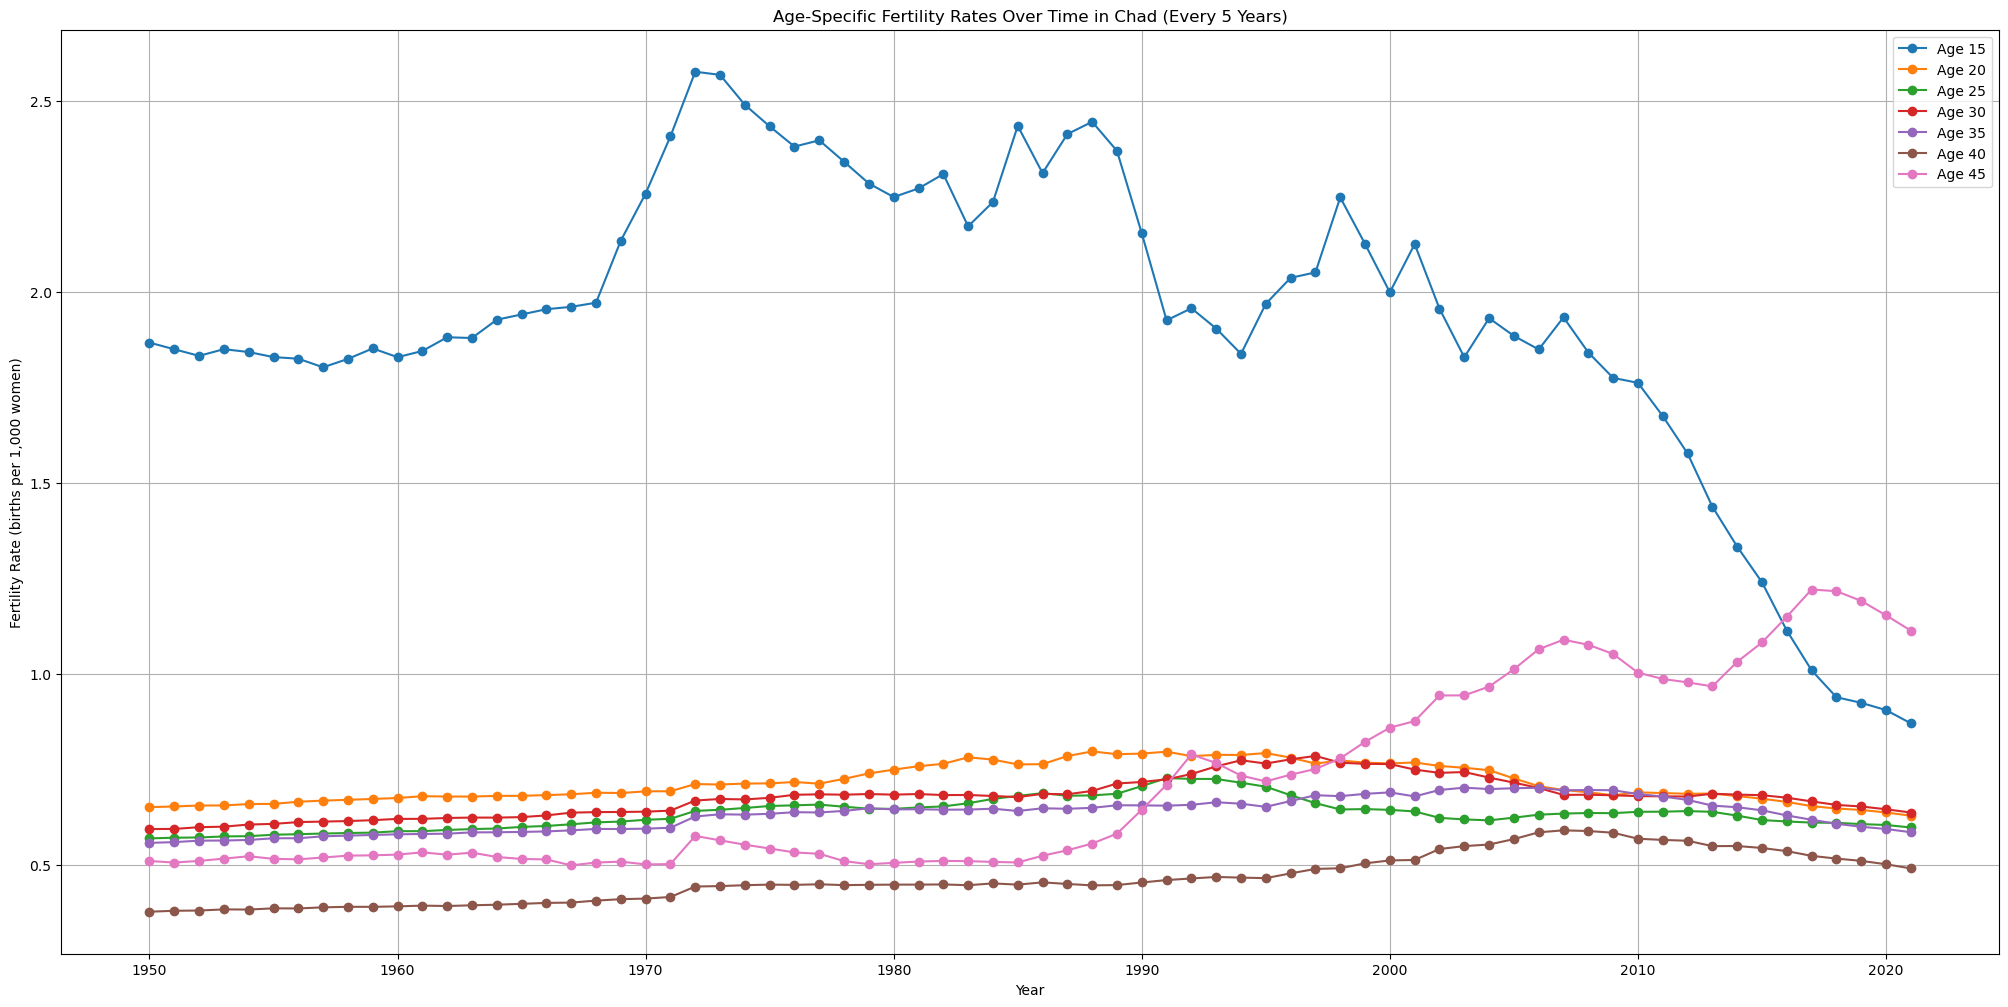

In [33]:
# Specify the age groups you want to visualize (every five years)
age_groups = [str(age) for age in range(15, 50, 5)]

# Select a specific country or region (e.g., Spain in this example)
country_data = df[df['Country-Name'] == 'Chad']

# Extract the year column
years = country_data['Year']

# Extract the fertility rate data for the selected age groups
fertility_rates = country_data[age_groups]

# Create a line plot
plt.figure(figsize=(25, 12))
for age in age_groups:
    plt.plot(years, fertility_rates[age], label=f'Age {age}', marker='o')

plt.xlabel('Year')
plt.ylabel('Fertility Rate (births per 1,000 women)')
plt.title('Age-Specific Fertility Rates Over Time in Chad (Every 5 Years)')
plt.legend()
plt.grid(True)
plt.show()


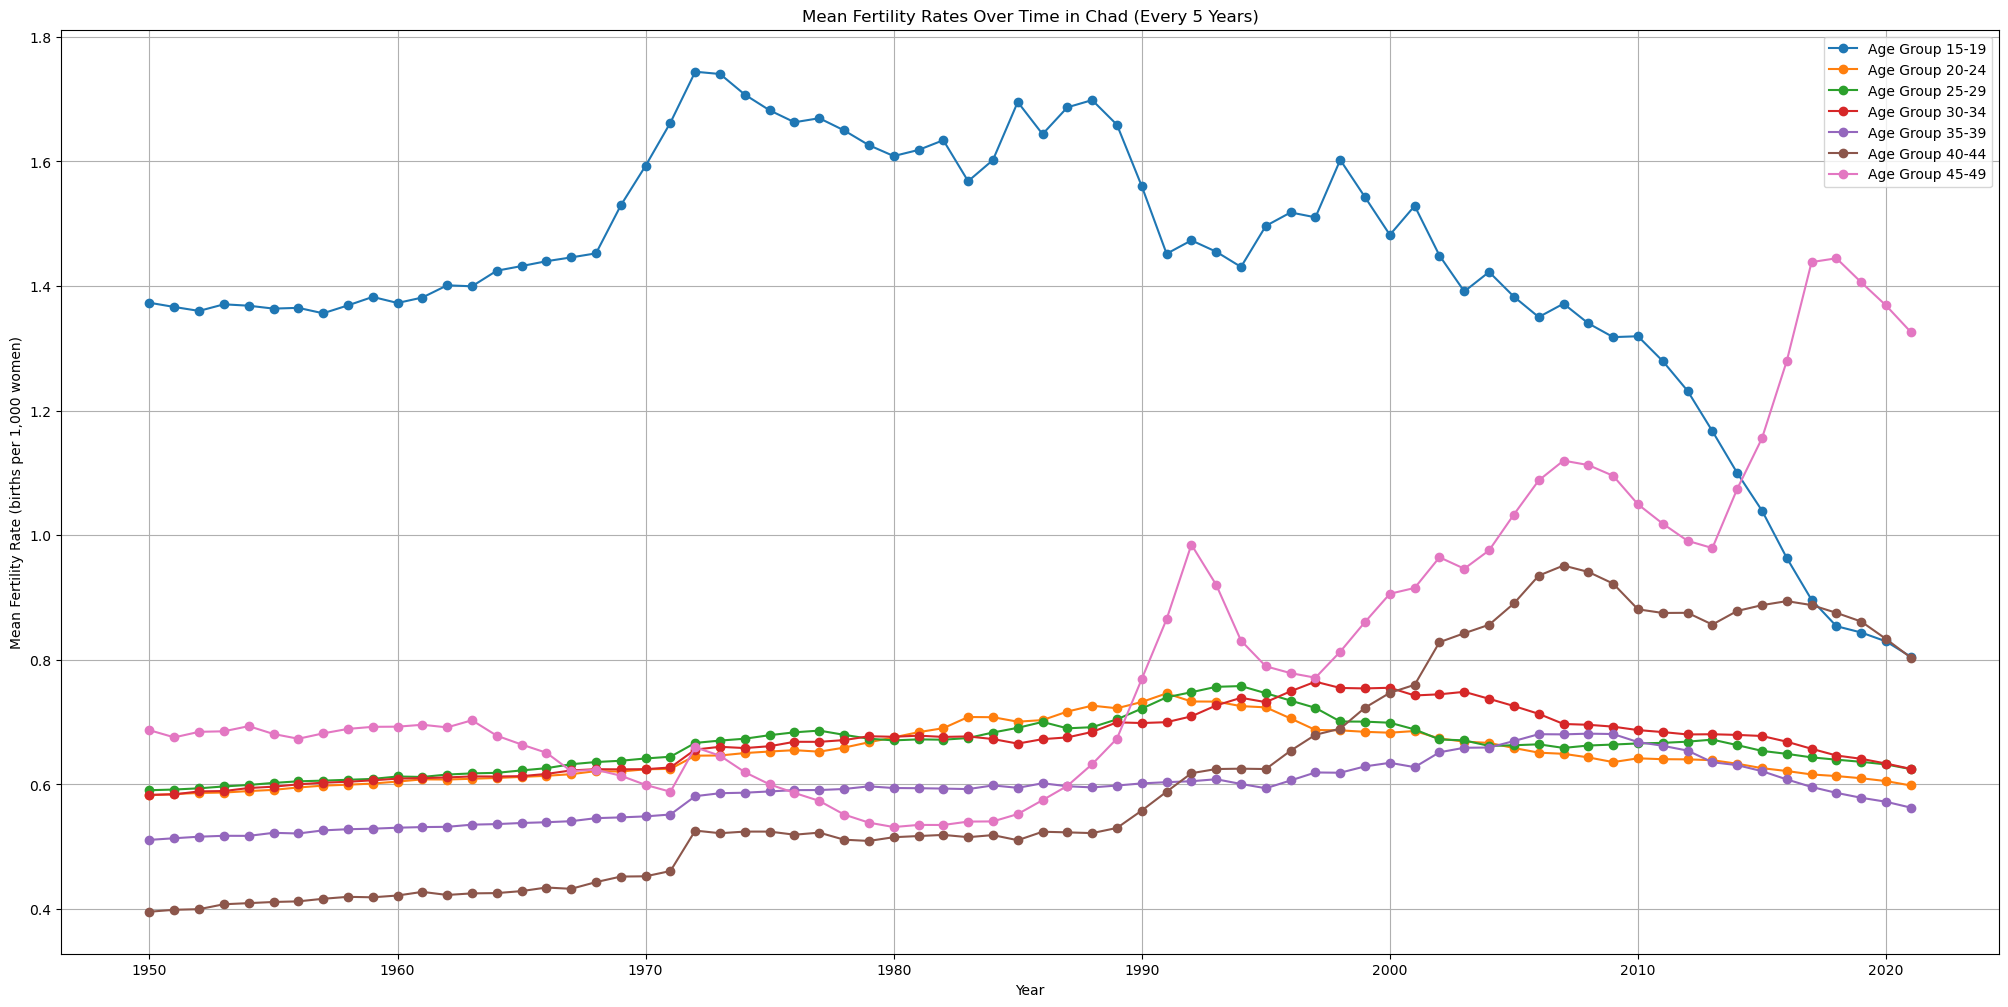

In [34]:
# Specify the age groups you want to visualize (every five years)
age_group_start_years = range(15, 50, 5)
age_group_labels = [f'{start}-{start+4}' for start in age_group_start_years]

# Select a specific country or region (e.g., Spain in this example)
country_data = df[df['Country-Name'] == 'Chad']

# Extract the year column
years = country_data['Year']

# Initialize an empty list to store the mean fertility rates for each age group
mean_fertility_rates = []

# Calculate the mean fertility rate for each age group
for start in age_group_start_years:
    age_group_columns = [str(age) for age in range(start, start + 5)]
    mean_fertility_rate = country_data[age_group_columns].mean(axis=1)
    mean_fertility_rates.append(mean_fertility_rate)

# Create a line plot
plt.figure(figsize=(25, 12))
for i, age_group_label in enumerate(age_group_labels):
    plt.plot(years, mean_fertility_rates[i], label=f'Age Group {age_group_label}', marker='o')

plt.xlabel('Year')
plt.ylabel('Mean Fertility Rate (births per 1,000 women)')
plt.title('Mean Fertility Rates Over Time in Chad (Every 5 Years)')
plt.legend()
plt.grid(True)
plt.show()


# Spain

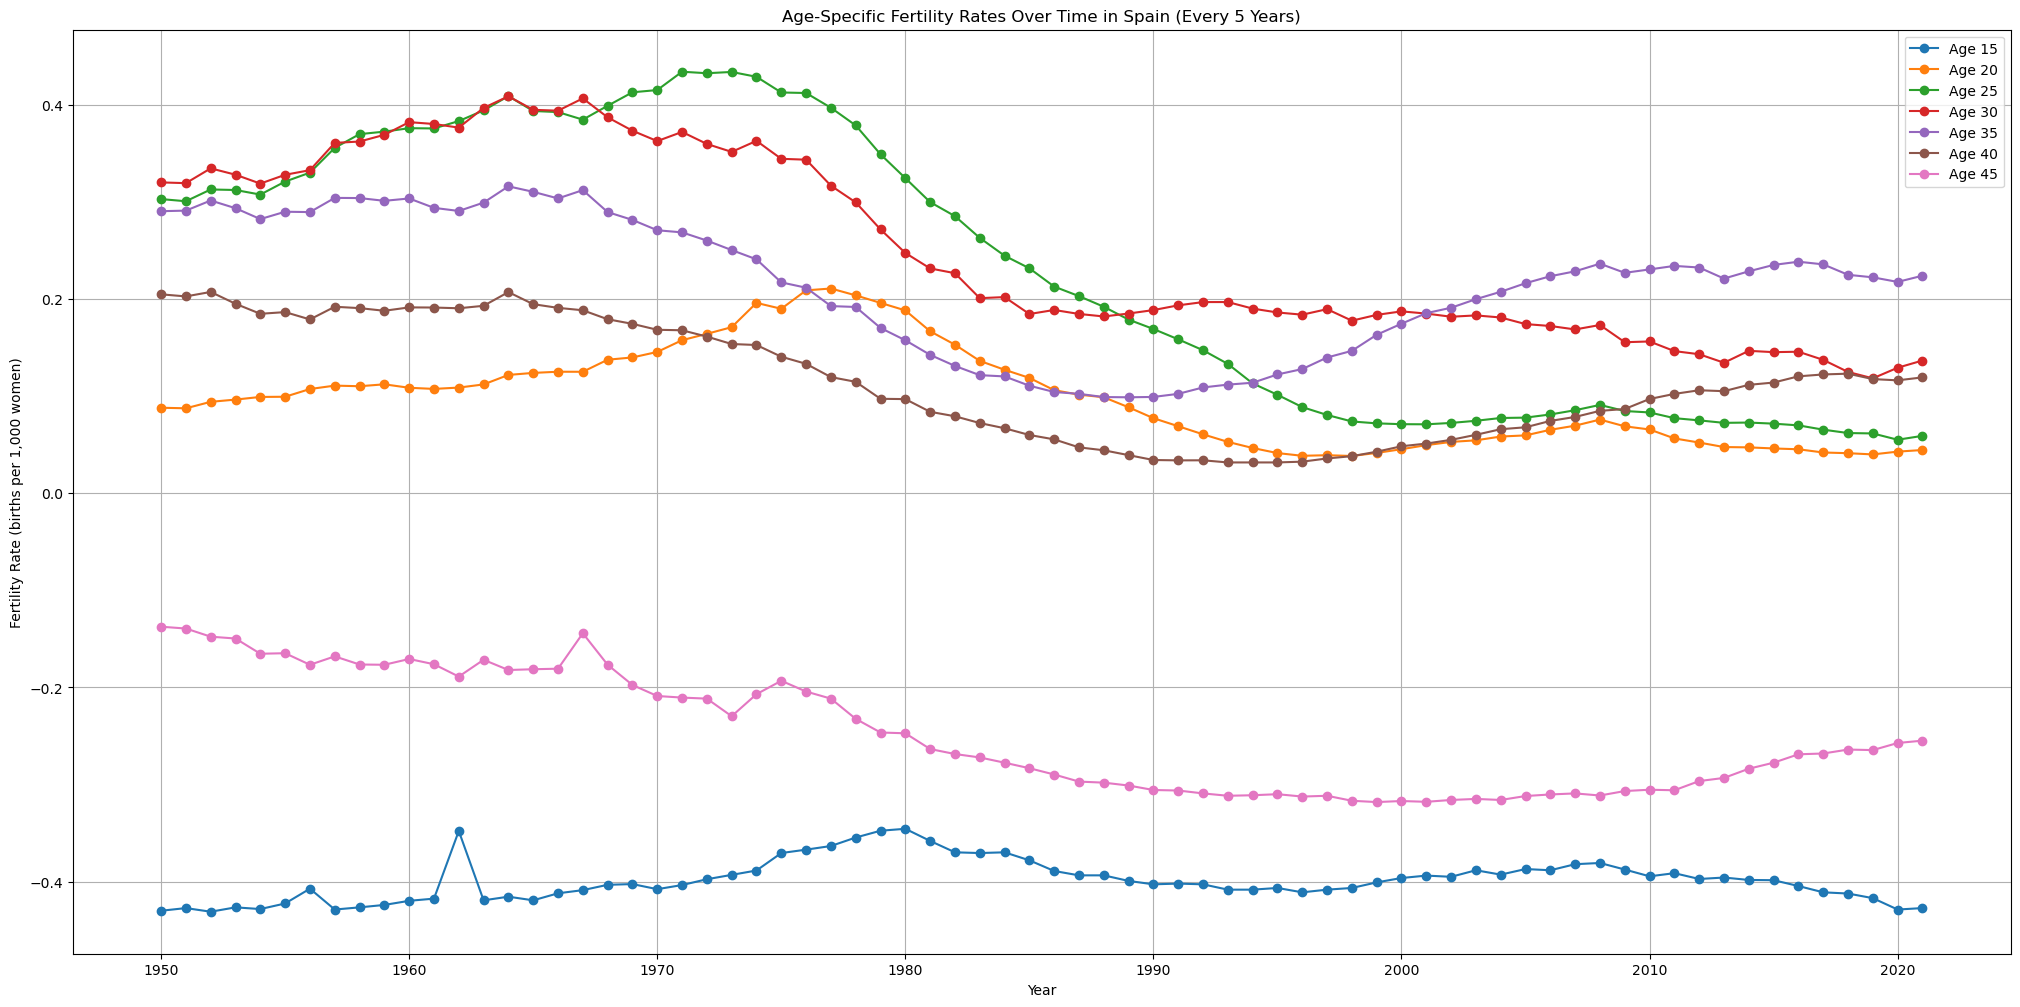

In [35]:
# Specify the age groups you want to visualize (every five years)
age_groups = [str(age) for age in range(15, 50, 5)]

# Select a specific country or region (e.g., Spain in this example)
country_data = df[df['Country-Name'] == 'Spain']

# Extract the year column
years = country_data['Year']

# Extract the fertility rate data for the selected age groups
fertility_rates = country_data[age_groups]

# Create a line plot
plt.figure(figsize=(25, 12))
for age in age_groups:
    plt.plot(years, fertility_rates[age], label=f'Age {age}', marker='o')

plt.xlabel('Year')
plt.ylabel('Fertility Rate (births per 1,000 women)')
plt.title('Age-Specific Fertility Rates Over Time in Spain (Every 5 Years)')
plt.legend()
plt.grid(True)
plt.show()


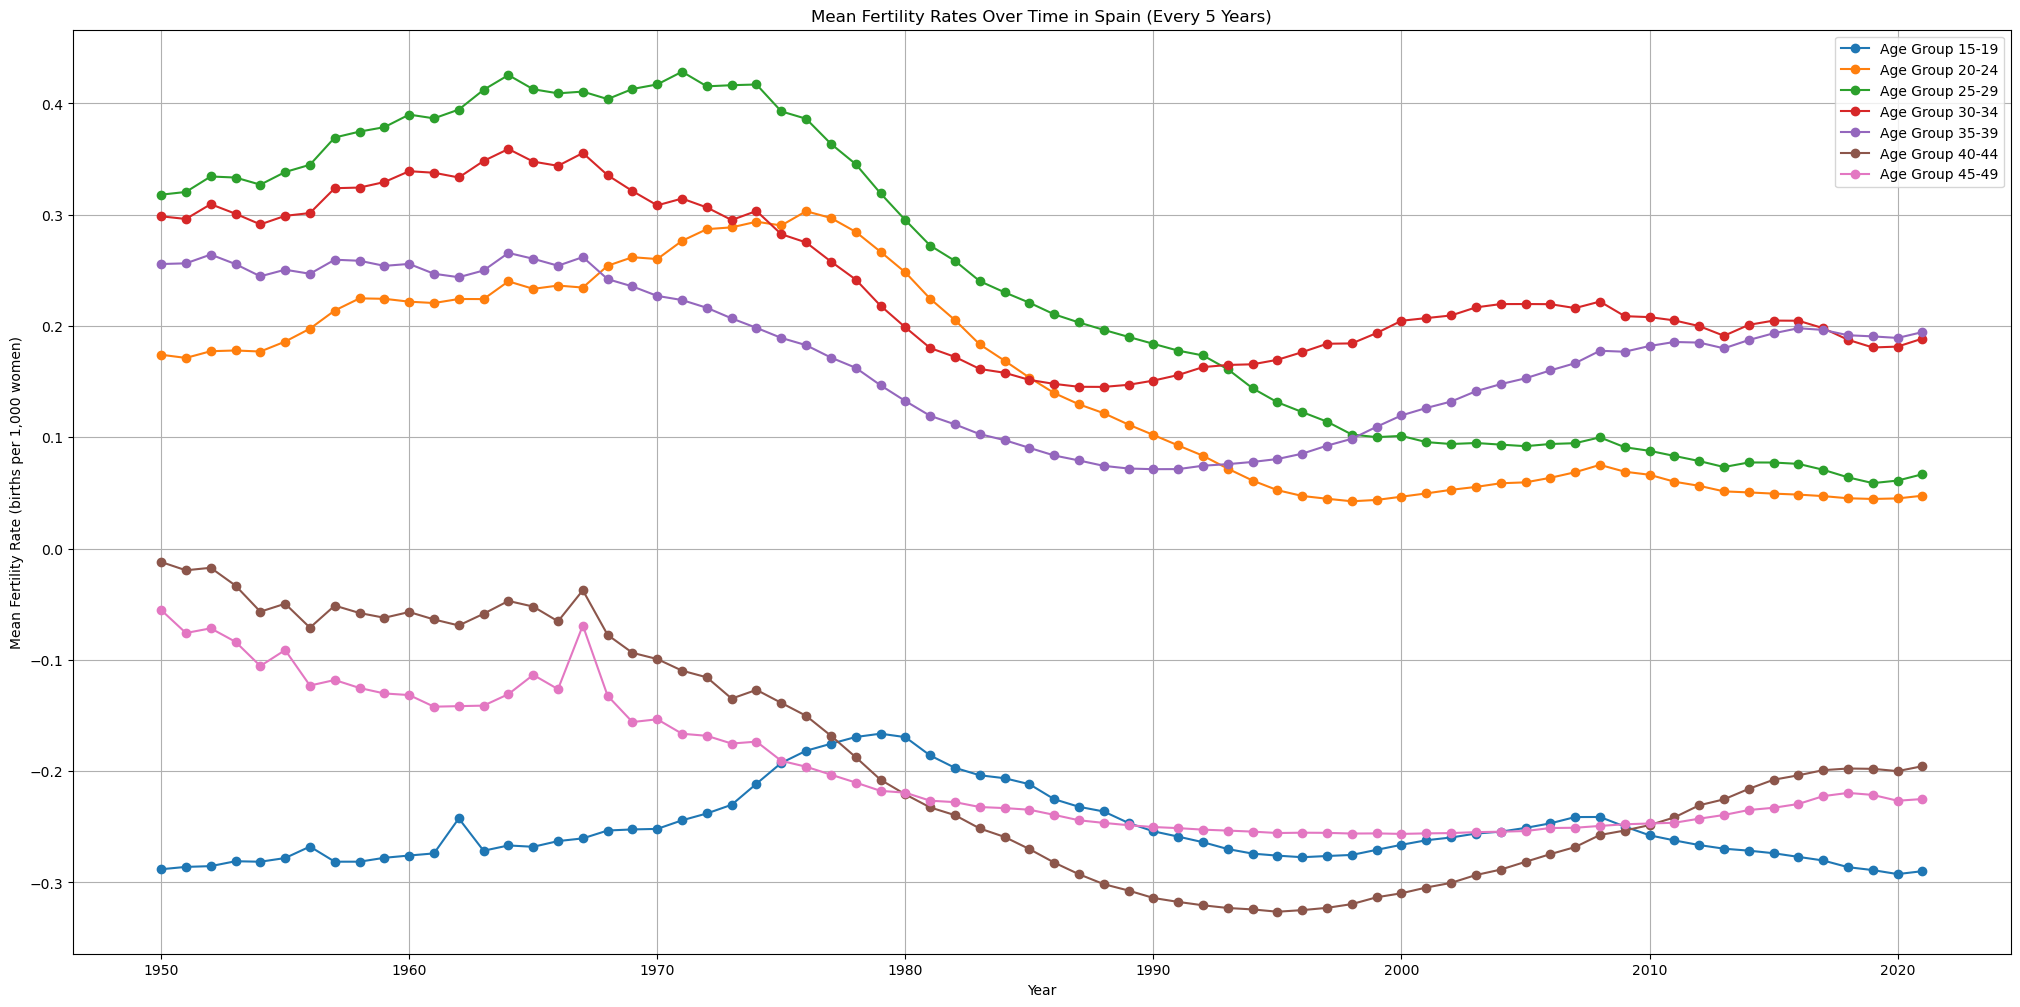

In [36]:
# Specify the age groups you want to visualize (every five years)
age_group_start_years = range(15, 50, 5)
age_group_labels = [f'{start}-{start+4}' for start in age_group_start_years]

# Select a specific country or region (e.g., Spain in this example)
country_data = df[df['Country-Name'] == 'Spain']

# Extract the year column
years = country_data['Year']

# Initialize an empty list to store the mean fertility rates for each age group
mean_fertility_rates = []

# Calculate the mean fertility rate for each age group
for start in age_group_start_years:
    age_group_columns = [str(age) for age in range(start, start + 5)]
    mean_fertility_rate = country_data[age_group_columns].mean(axis=1)
    mean_fertility_rates.append(mean_fertility_rate)

# Create a line plot
plt.figure(figsize=(25, 12))
for i, age_group_label in enumerate(age_group_labels):
    plt.plot(years, mean_fertility_rates[i], label=f'Age Group {age_group_label}', marker='o')

plt.xlabel('Year')
plt.ylabel('Mean Fertility Rate (births per 1,000 women)')
plt.title('Mean Fertility Rates Over Time in Spain (Every 5 Years)')
plt.legend()
plt.grid(True)
plt.show()


# Singapore

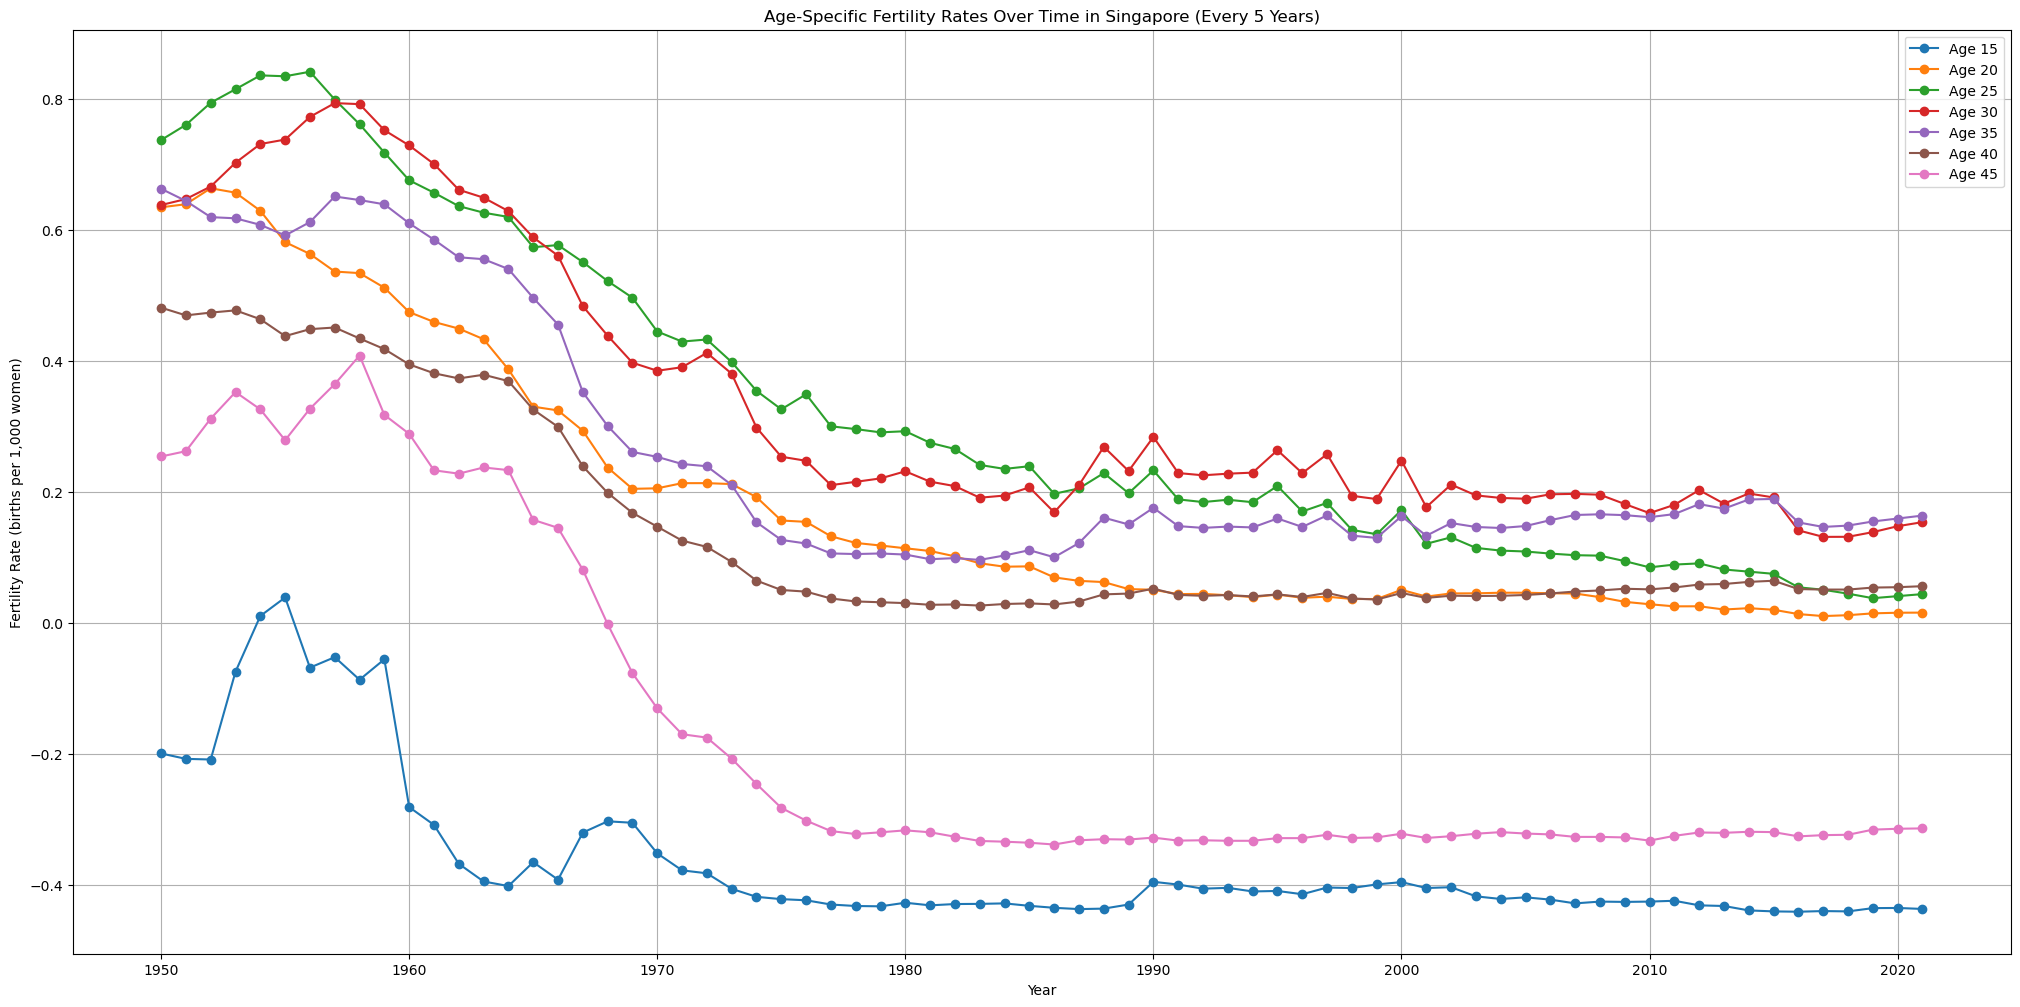

In [37]:
# Specify the age groups you want to visualize (every five years)
age_groups = [str(age) for age in range(15, 50, 5)]

# Select a specific country or region (e.g., Spain in this example)
country_data = df[df['Country-Name'] == 'Singapore']

# Extract the year column
years = country_data['Year']

# Extract the fertility rate data for the selected age groups
fertility_rates = country_data[age_groups]

# Create a line plot
plt.figure(figsize=(25, 12))
for age in age_groups:
    plt.plot(years, fertility_rates[age], label=f'Age {age}', marker='o')

plt.xlabel('Year')
plt.ylabel('Fertility Rate (births per 1,000 women)')
plt.title('Age-Specific Fertility Rates Over Time in Singapore (Every 5 Years)')
plt.legend()
plt.grid(True)
plt.show()


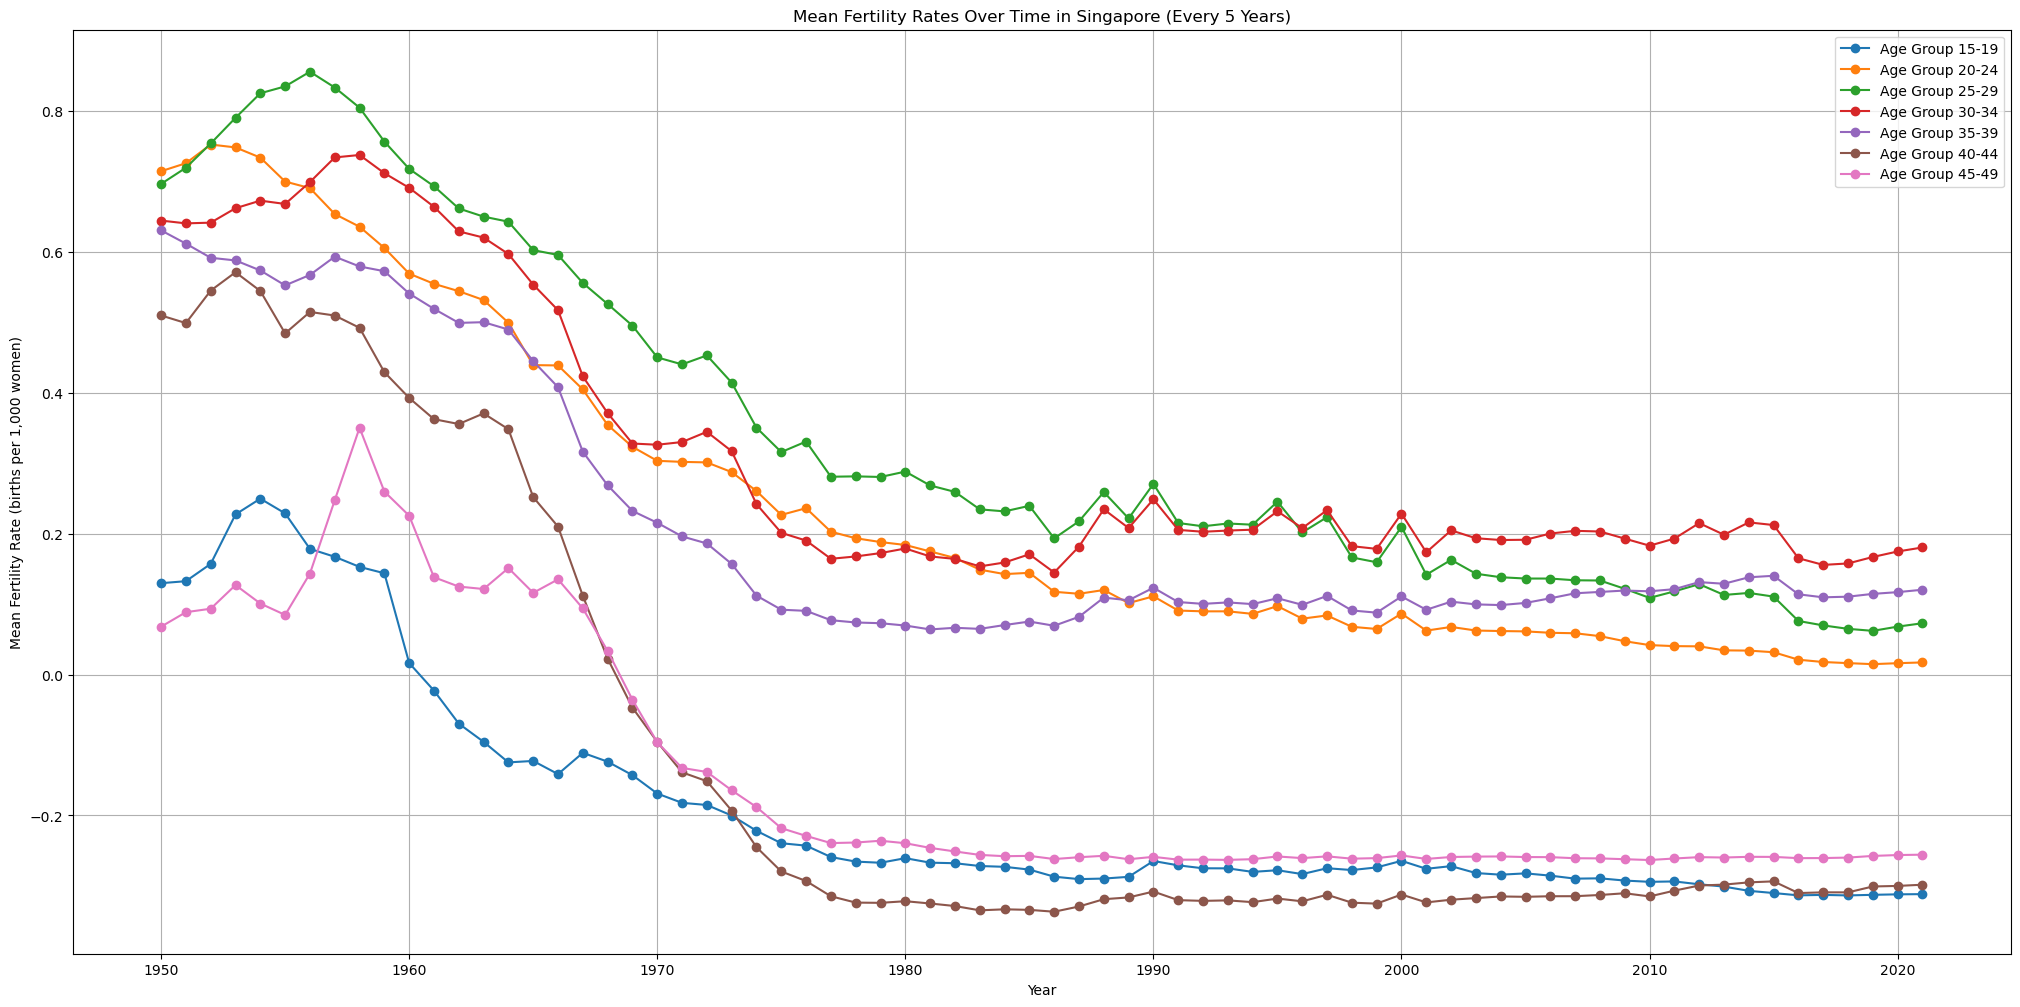

In [38]:
# Specify the age groups you want to visualize (every five years)
age_group_start_years = range(15, 50, 5)
age_group_labels = [f'{start}-{start+4}' for start in age_group_start_years]

# Select a specific country or region (e.g., Spain in this example)
country_data = df[df['Country-Name'] == 'Singapore']

# Extract the year column
years = country_data['Year']

# Initialize an empty list to store the mean fertility rates for each age group
mean_fertility_rates = []

# Calculate the mean fertility rate for each age group
for start in age_group_start_years:
    age_group_columns = [str(age) for age in range(start, start + 5)]
    mean_fertility_rate = country_data[age_group_columns].mean(axis=1)
    mean_fertility_rates.append(mean_fertility_rate)

# Create a line plot
plt.figure(figsize=(25, 12))
for i, age_group_label in enumerate(age_group_labels):
    plt.plot(years, mean_fertility_rates[i], label=f'Age Group {age_group_label}', marker='o')

plt.xlabel('Year')
plt.ylabel('Mean Fertility Rate (births per 1,000 women)')
plt.title('Mean Fertility Rates Over Time in Singapore (Every 5 Years)')
plt.legend()
plt.grid(True)
plt.show()


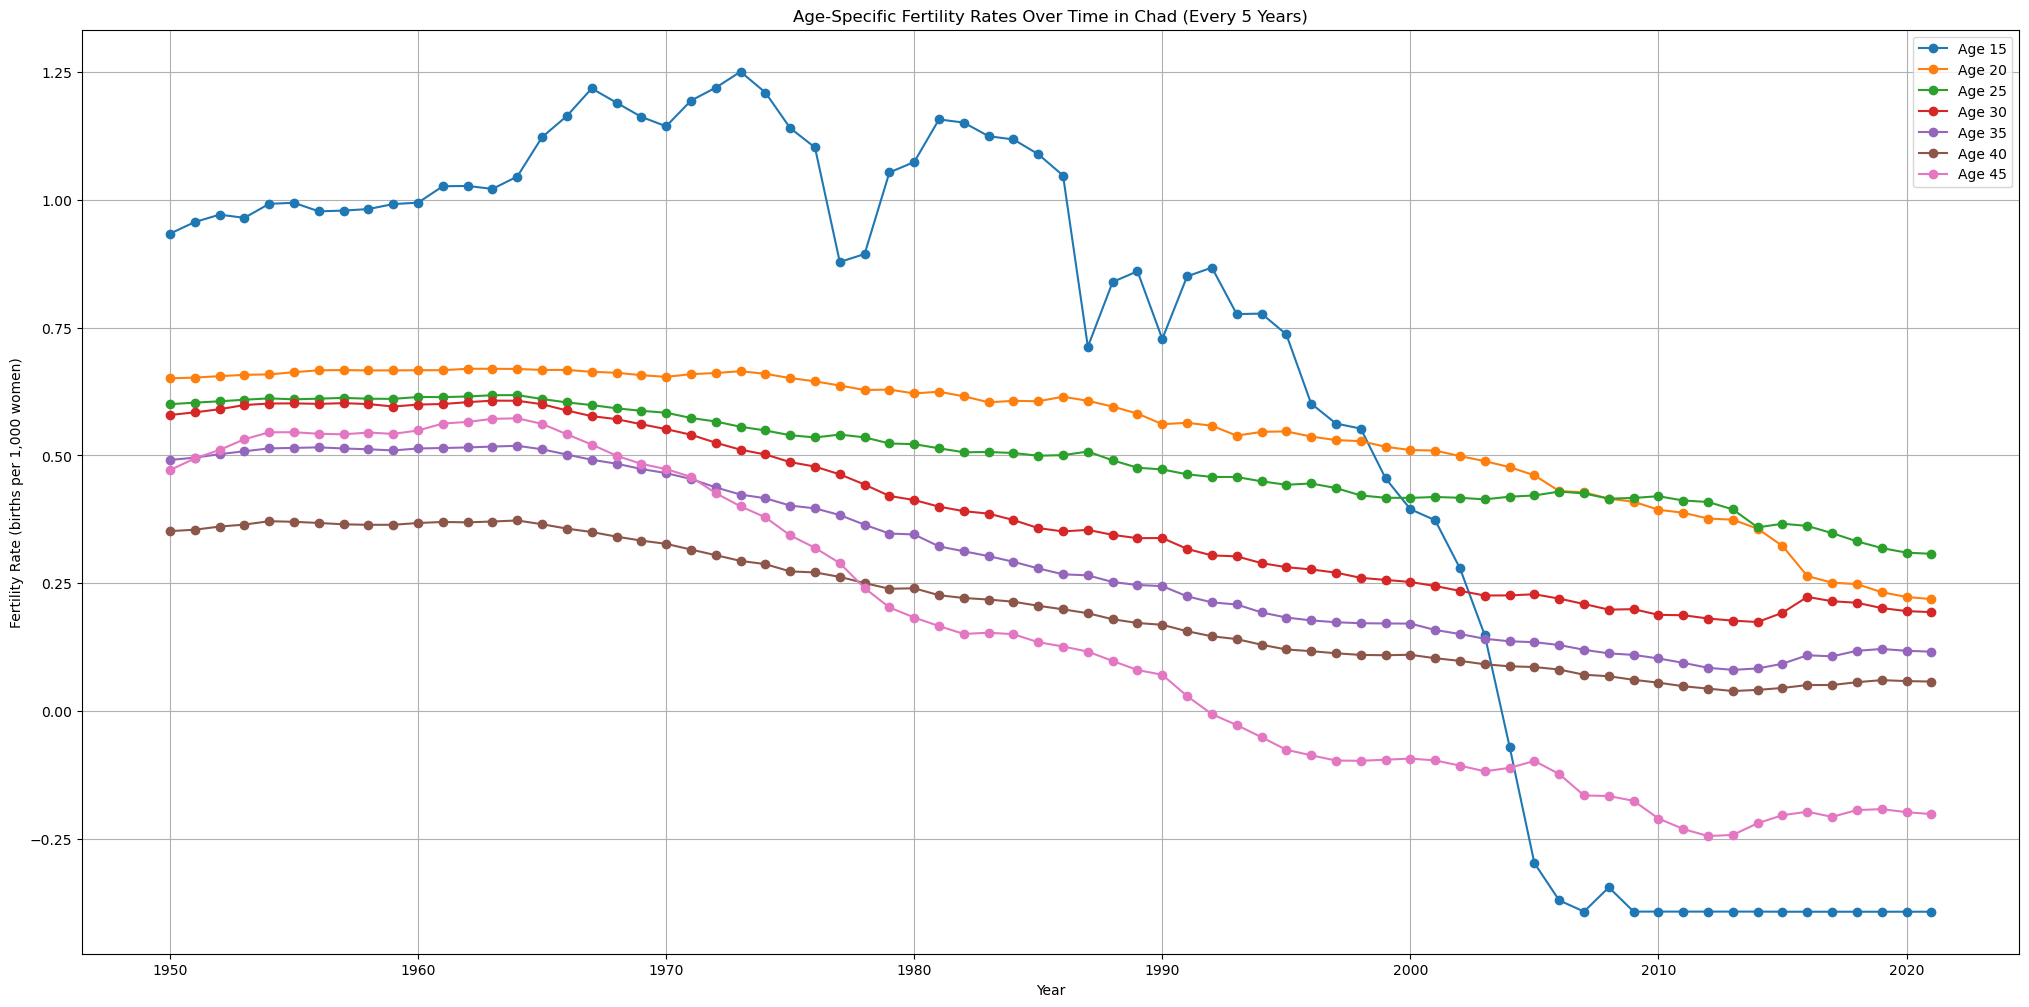

In [39]:
# Specify the age groups you want to visualize (every five years)
age_groups = [str(age) for age in range(15, 50, 5)]

# Select a specific country or region (e.g., Spain in this example)
country_data = df[df['Country-Name'] == 'India']

# Extract the year column
years = country_data['Year']

# Extract the fertility rate data for the selected age groups
fertility_rates = country_data[age_groups]

# Create a line plot
plt.figure(figsize=(25, 12))
for age in age_groups:
    plt.plot(years, fertility_rates[age], label=f'Age {age}', marker='o')

plt.xlabel('Year')
plt.ylabel('Fertility Rate (births per 1,000 women)')
plt.title('Age-Specific Fertility Rates Over Time in Chad (Every 5 Years)')
plt.legend()
plt.grid(True)
plt.show()


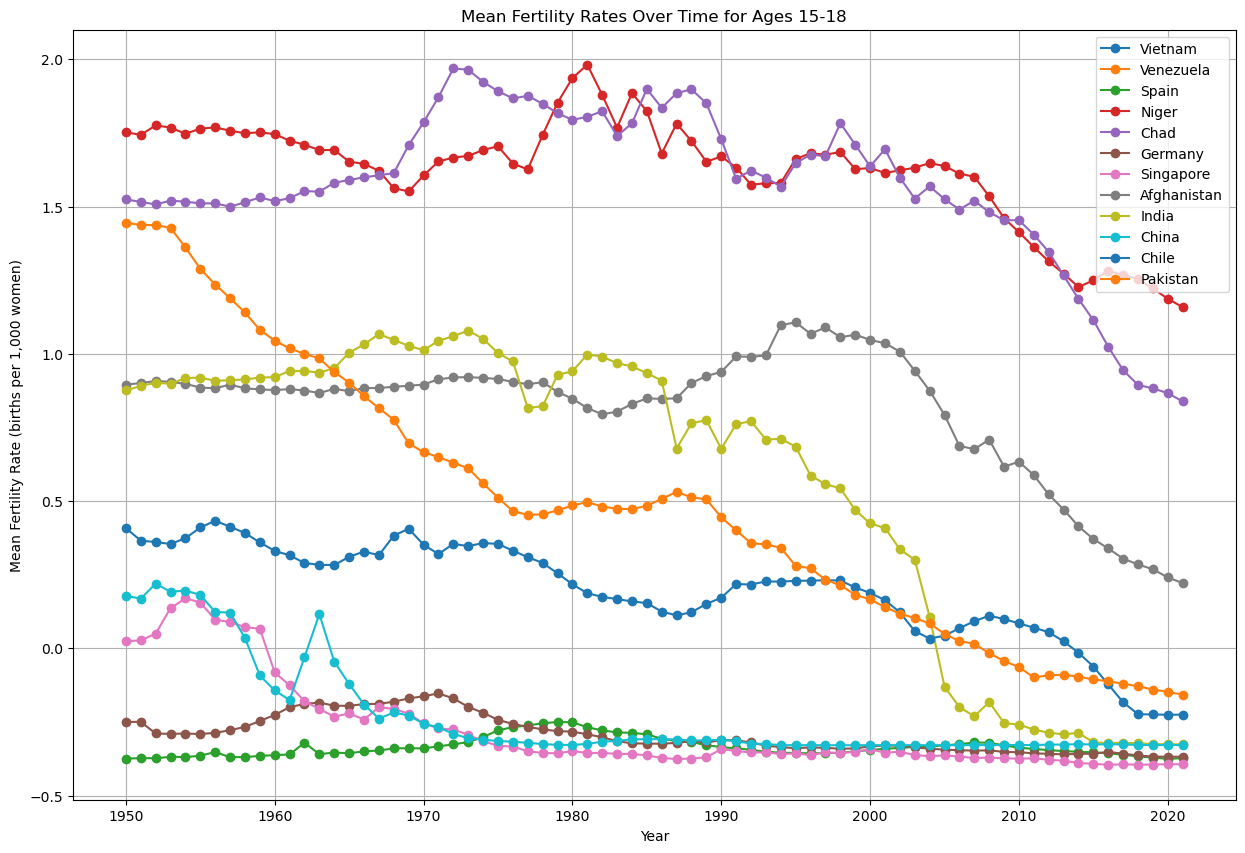

In [40]:
# Specify the age group (ages 15-18)
age_group_start_years = [15]
age_group_labels = ['15-18']

# Select specific countries for comparison (e.g., Spain, France, Italy, Germany, Singapore)
countries_to_compare = ['Vietnam','Venezuela', 'Spain', 'Niger', 'Chad', 'Germany', 'Singapore', 'Afghanistan', 'India', 'China', 'Chile', 'Pakistan']

# Initialize an empty list to store mean fertility rates for each country
mean_fertility_rates = {country: [] for country in countries_to_compare}

# Create a single figure for all countries
fig, ax = plt.subplots(figsize=(15, 10))

# Calculate and plot mean fertility rates for each country and age group
for i, country in enumerate(countries_to_compare):
    country_data = df[df['Country-Name'] == country]
    age_group_columns = [str(age) for age in range(15, 19)]  # Select columns for ages 15-18
    mean_fertility_rate = country_data[age_group_columns].mean(axis=1)
    mean_fertility_rates[country].append(mean_fertility_rate)

    # Plot mean fertility rates for each country
    ax.plot(country_data['Year'], mean_fertility_rate, label=country, marker='o')

ax.set_title('Mean Fertility Rates Over Time for Ages 15-18')
ax.grid(True)
ax.legend()
plt.xlabel('Year')
plt.ylabel('Mean Fertility Rate (births per 1,000 women)')
plt.show()


In [41]:
df.head()

Country-Name Country-Code    Year        15        16        17  \
1732      Burundi          BDI  1950.0  0.402122  0.366673  0.366936   
1733      Burundi          BDI  1951.0  0.395382  0.361836  0.363790   
1734      Burundi          BDI  1952.0  0.373916  0.341432  0.344235   
1735      Burundi          BDI  1953.0  0.364181  0.332061  0.336930   
1736      Burundi          BDI  1954.0  0.371170  0.340979  0.344235   

            18        19        20        21  ...        40        41  \
1732  0.429475  0.504826  0.529077  0.550857  ...  0.794113  1.646091   
1733  0.428885  0.504563  0.529002  0.550698  ...  0.796503  1.655069   
1734  0.422493  0.498976  0.524891  0.547812  ...  0.798210  1.660940   
1735  0.421116  0.498947  0.526179  0.549698  ...  0.799158  1.663242   
1736  0.422395  0.498655  0.524420  0.547675  ...  0.804354  1.677861   

            42        43        44        45        46        47        48  \
1732  1.733153  1.755989  1.744036  1.700561  1.594965  1.503998  1.444978   
1733  1.742701  1.763193  1.745085  1.692994  1.576086  1.473404  1.405355   
1734  1.749896  1.771402  1.754103  1.702723  1.585875  1.483602  1.417118   
1735  1.751833  1.773078  1.755990  1.704344  1.587274  1.484992  1.418356   
1736  1.766224  1.784972  1.762282  1.703804  1.578533  1.467841  1.394211   

            49  
1732  1.434896  
1733  1.389193  
1734  1.402523  
1735  1.404428  
1736  1.374911  

[5 rows x 38 columns]

In [42]:
# Assuming your DataFrame is named df
summary_statistics = df.iloc[:, 4:50].describe()

# Display the summary statistics
print(summary_statistics)


                 16            17            18            19            20  \
count  16992.000000  16992.000000  16992.000000  16992.000000  16992.000000   
mean       0.195256      0.161199      0.337792      0.385203      0.388400   
std        0.683746      0.662018      0.226168      0.221511      0.200859   
min       -0.523559     -0.662733      0.000000      0.000000      0.000000   
25%       -0.386019     -0.401214      0.149113      0.202245      0.222874   
50%        0.000000      0.000000      0.293605      0.363030      0.383520   
75%        0.613981      0.598786      0.498295      0.552545      0.551571   
max        3.345248      2.656102      1.000000      1.000000      1.000000   

                 21            22            23            24            25  \
count  16992.000000  16992.000000  16992.000000  16992.000000  16992.000000   
mean       0.394084      0.401976      0.413755      0.425348      0.432091   
std        0.194220      0.191822      0.186881    

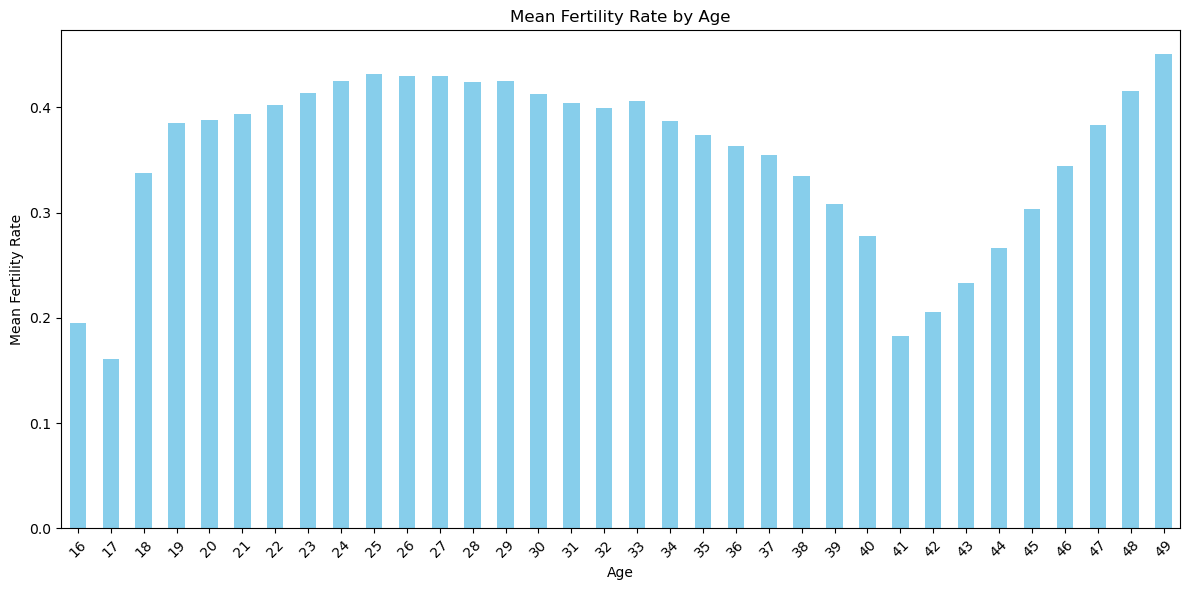

In [43]:
# Create a DataFrame with the summary statistics
summary_statistics = df.iloc[:, 4:50].describe().transpose()

# Plot the mean values as a bar chart
plt.figure(figsize=(12, 6))
summary_statistics['mean'].plot(kind='bar', color='skyblue')
plt.title('Mean Fertility Rate by Age')
plt.xlabel('Age')
plt.ylabel('Mean Fertility Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


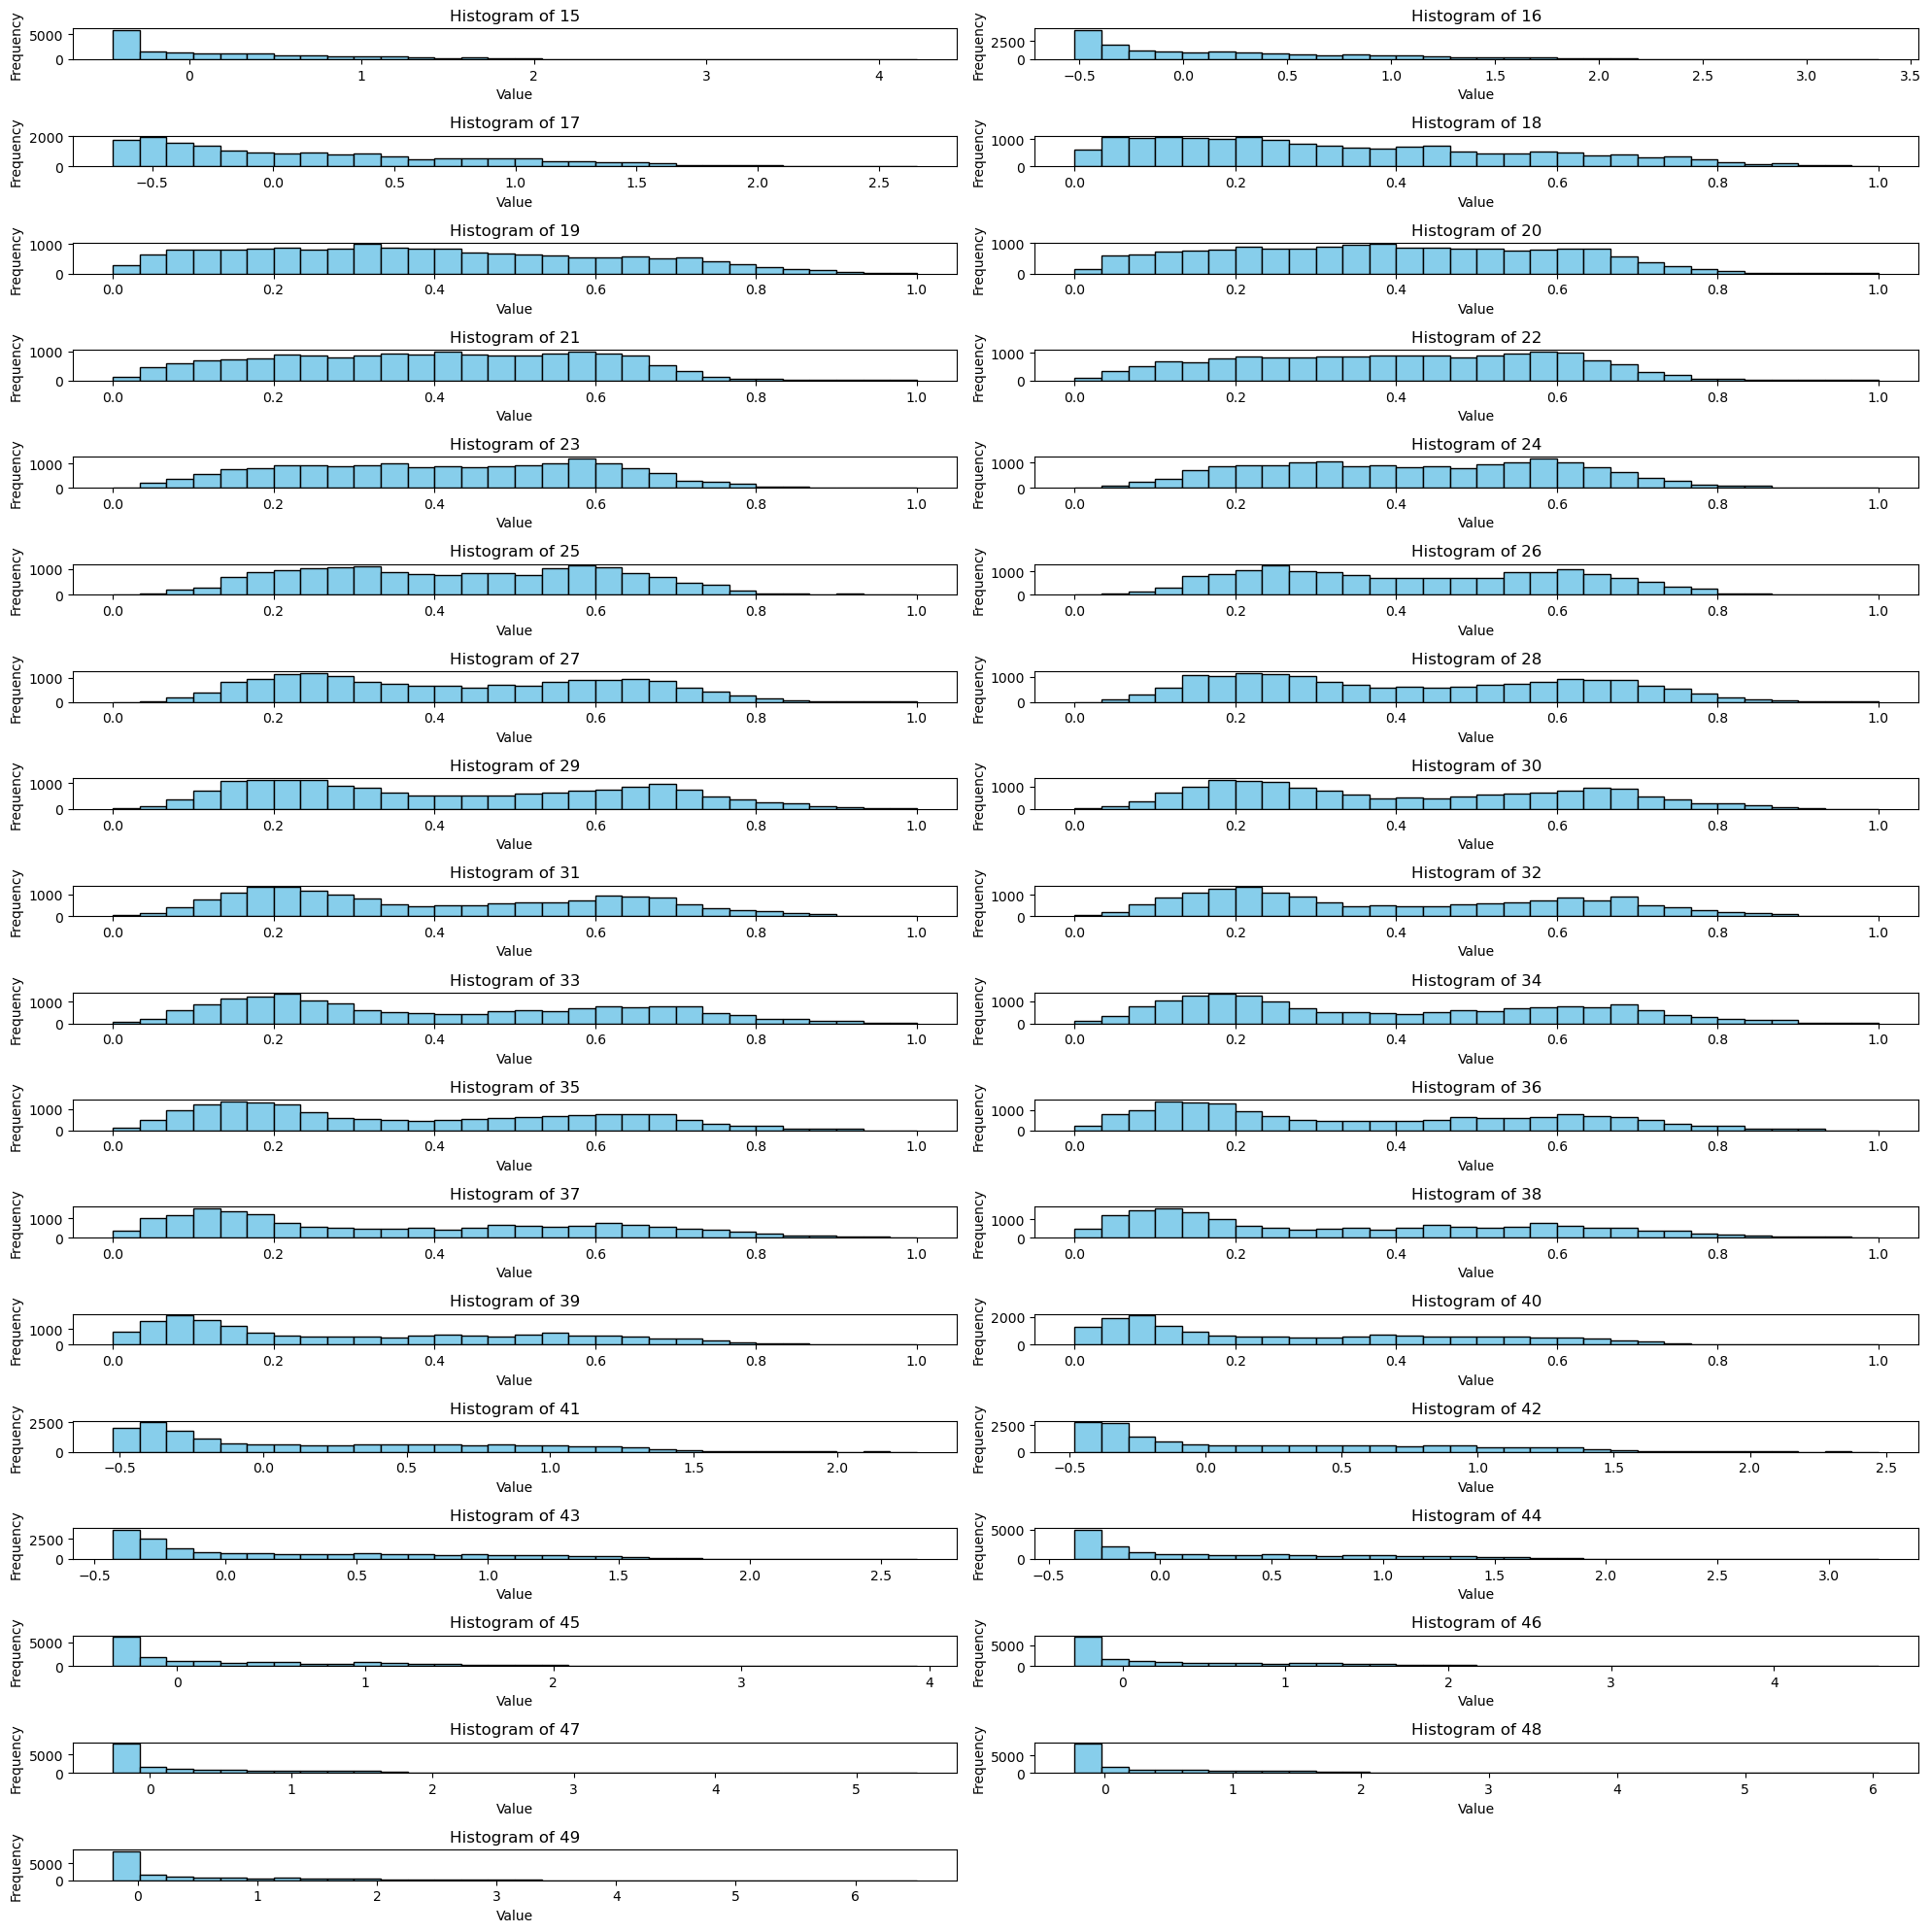

In [44]:
# Select the columns you want to create histograms for
columns_to_plot = ['15', '16', '17','18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']

# Set up subplots for multiple histograms
num_columns = len(columns_to_plot)
num_rows = (num_columns + 1) // 2  # Adjust the number of rows as needed
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Loop through the selected columns and create histograms
for i, col in enumerate(columns_to_plot):
    row, col_num = divmod(i, 2)
    ax = axes[row, col_num]
    
    # Plot the histogram
    ax.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    
    # Customize labels and titles
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# If the number of columns is odd, remove the last empty subplot
if num_columns % 2 == 1:
    fig.delaxes(axes[num_rows - 1, 1])

# Show the plots
plt.tight_layout()
plt.show()


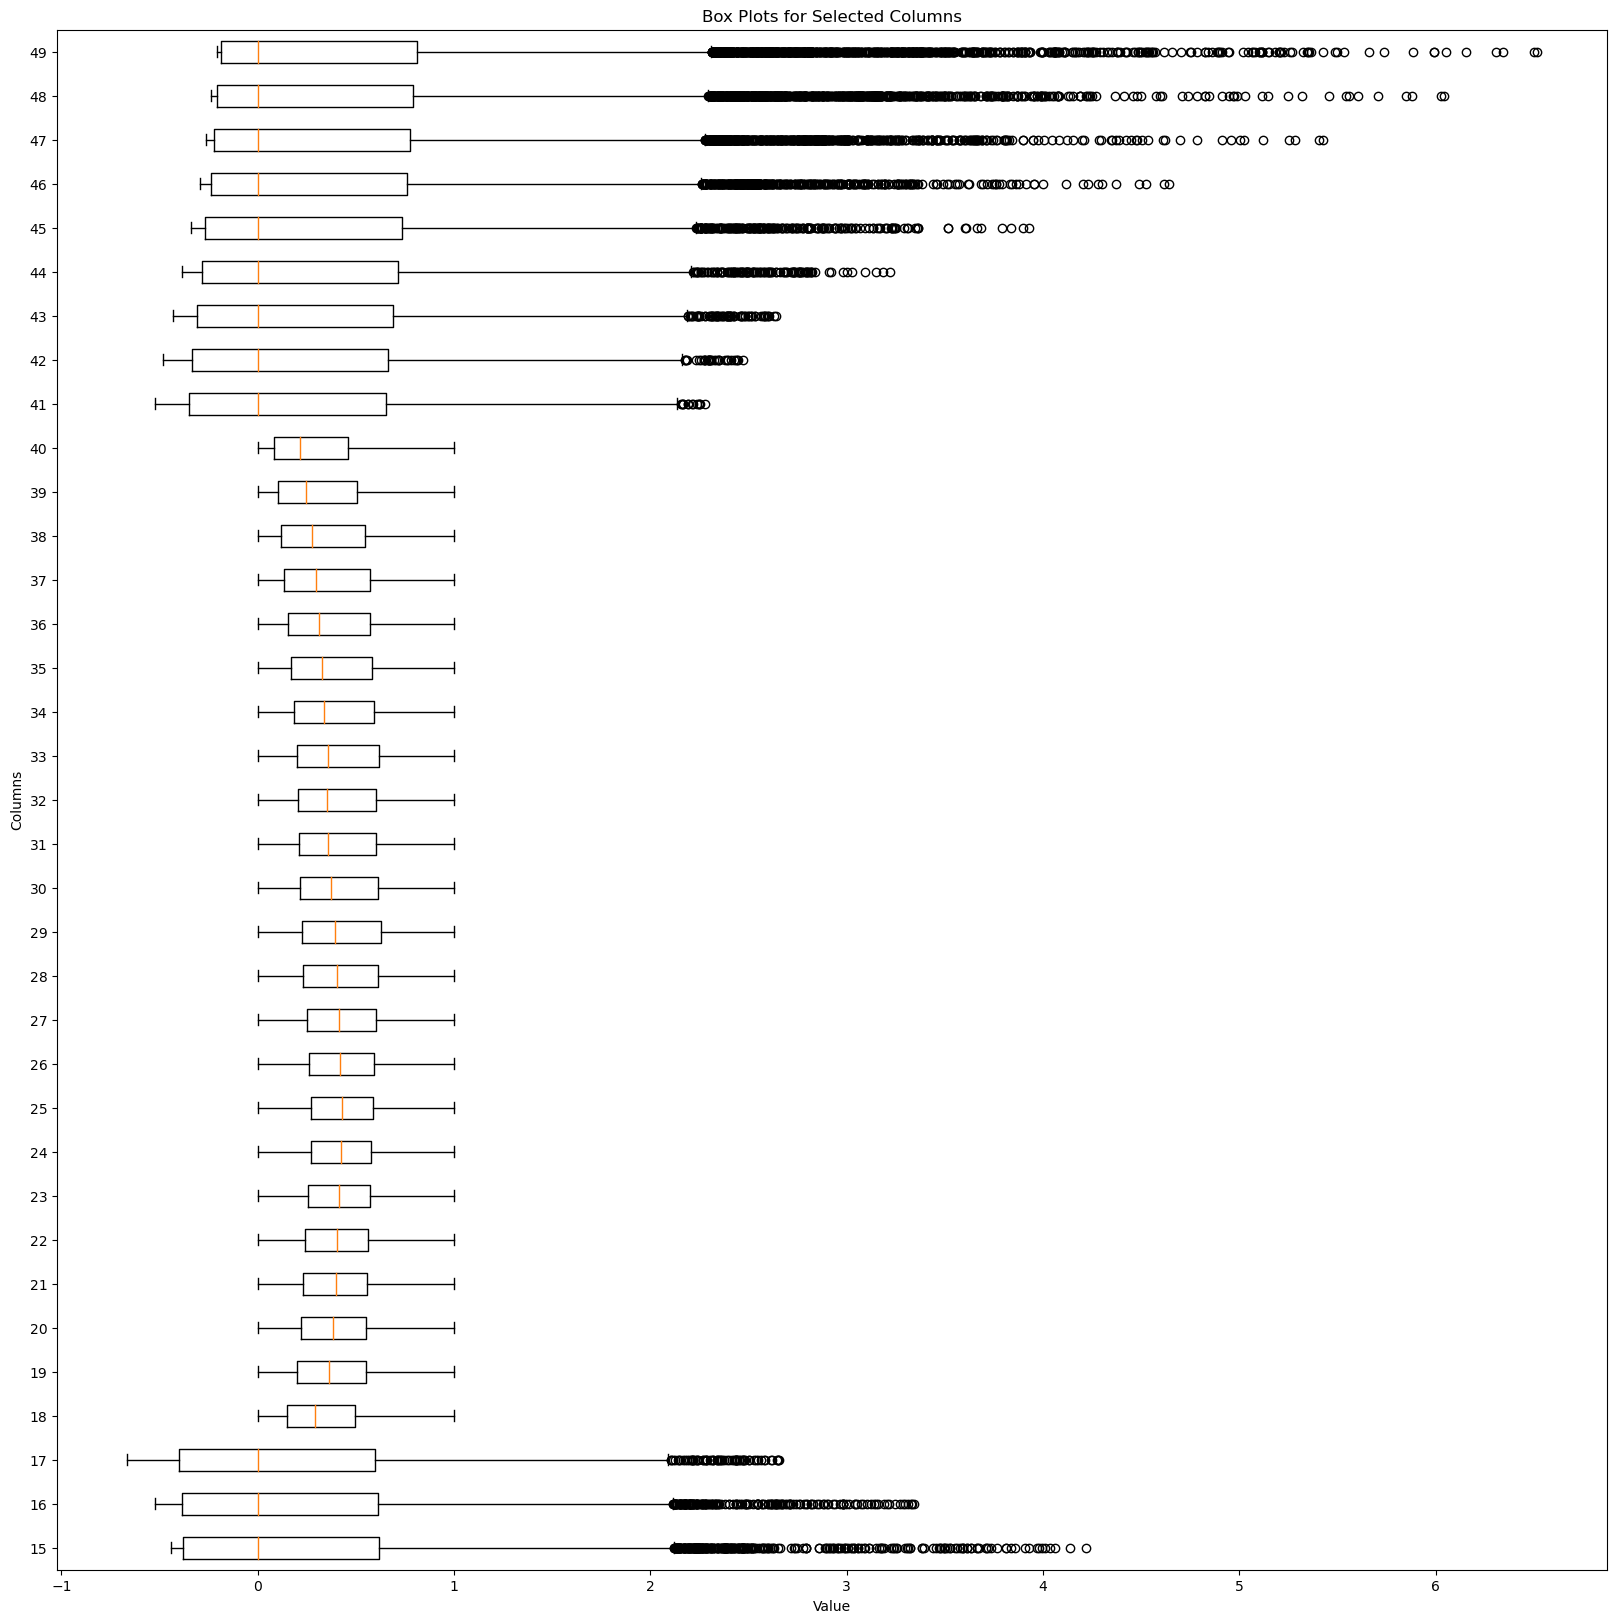

In [45]:
# Select the columns you want to create box plots for
columns_to_plot = ['15', '16', '17','18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']

# Create a box plot for each selected column
plt.figure(figsize=(20, 20))
plt.boxplot([df[col] for col in columns_to_plot], labels=columns_to_plot, vert=False)

# Customize labels and titles
plt.xlabel('Value')
plt.ylabel('Columns')
plt.title('Box Plots for Selected Columns')

# Show the plot
plt.show()


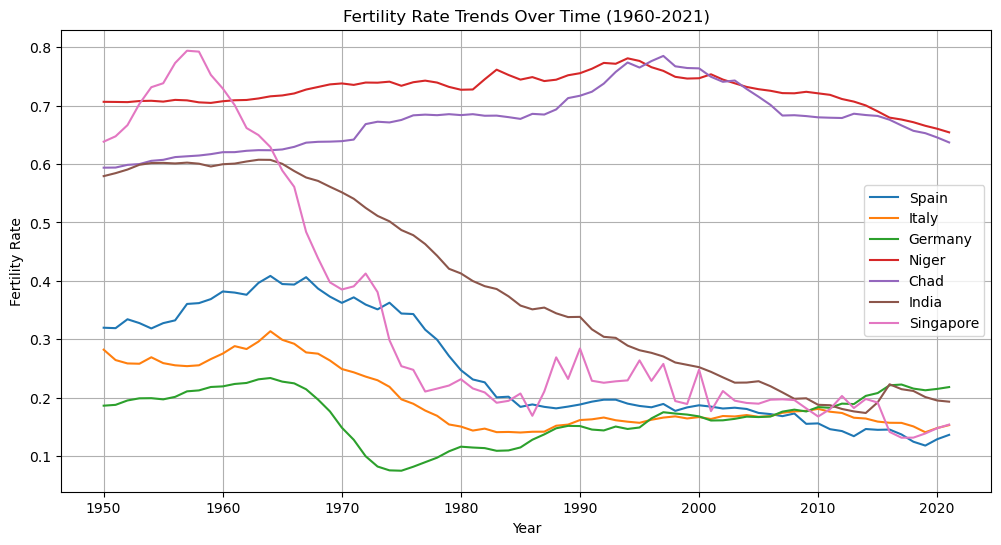

In [46]:
# Filter the DataFrame to select specific countries
selected_countries = ['Spain', 'Italy', 'Germany', 'Niger', 'Chad', 'India', 'Singapore']  # Replace with your desired country names
filtered_df = df[df['Country-Name'].isin(selected_countries)]

# Create a pivot table for selected countries and years
pivot_df = filtered_df.pivot(index='Year', columns='Country-Name', values='30')

# Create a line chart
plt.figure(figsize=(12, 6))
for country in selected_countries:
    plt.plot(pivot_df.index, pivot_df[country], label=country)

# Customize the chart
plt.title('Fertility Rate Trends Over Time (1960-2021)')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.legend()
plt.grid(True)

# Show the chart
plt.show()


# ML


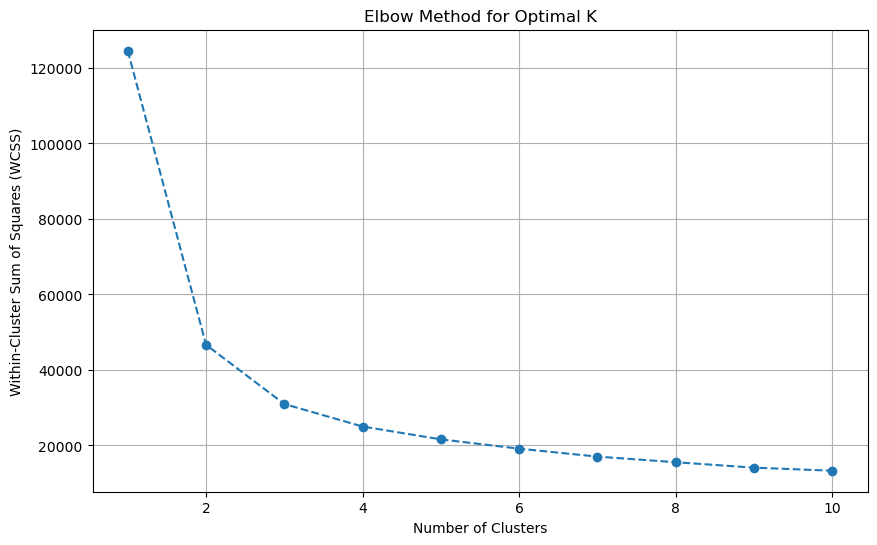

Cluster Counts:
Cluster
2    9364
0    4718
1    2910
Name: count, dtype: int64


In [47]:
from sklearn.cluster import KMeans

# Select relevant columns (e.g., columns '15' to '49')
data = df.loc[:, '15':'49']

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Based on the elbow curve, choose an optimal value for K (number of clusters)
optimal_k = 3  # Adjust this value based on the elbow plot

# Perform K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data)

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Visualize the results (you can use the code from the previous response)

# Print the count of data points in each cluster
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)


In [48]:
# cero=df[(df['Cluster']==0)&(df['Year']==2020)]
# uno=df[df['Cluster']==1]
# dos=df[df['Cluster']==2]
# print('min0 ',cero['Mean_Fertility_Rate'].min())
# print('max0 ',cero['Mean_Fertility_Rate'].max())
# print('min1 ',uno['Mean_Fertility_Rate'].min())
# print('max1 ',uno['Mean_Fertility_Rate'].max())
# print('min2 ',dos['Mean_Fertility_Rate'].min())
# print('max2 ',dos['Mean_Fertility_Rate'].max())

In [49]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Assuming you already have 'df' with cluster labels in 'Cluster' column

# Extract the features used for clustering (e.g., ages 15-49)
data = df.loc[:, '15':'49']

# Calculate the Silhouette Score for the clustering
silhouette_avg = silhouette_score(data, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Optionally, you can calculate Silhouette Scores for each data point
sample_silhouette_values = silhouette_samples(data, df['Cluster'])

# 'sample_silhouette_values' now contains the Silhouette Score for each data point


Silhouette Score: 0.4938175751500867


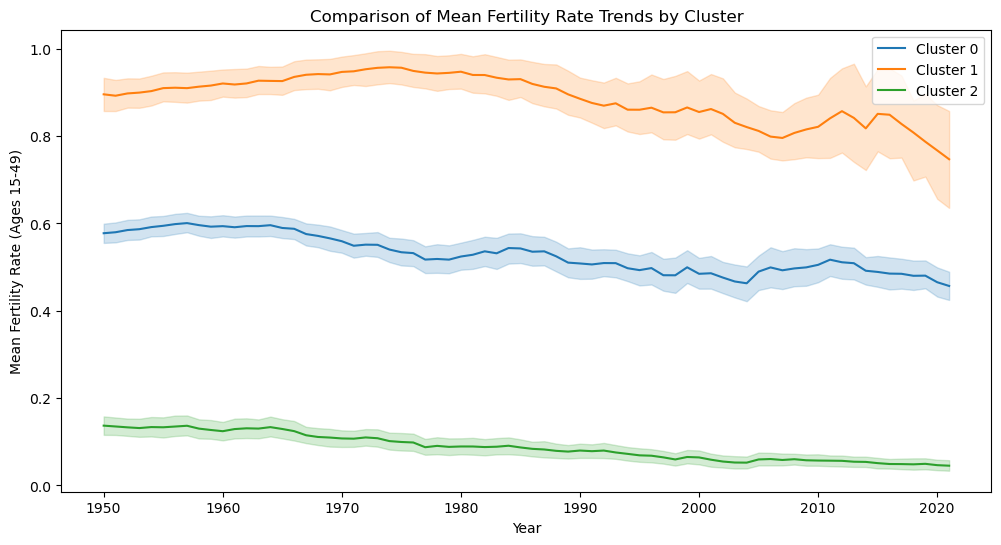

In [50]:
# Calculate the mean fertility rate across all ages from 15 to 49
df['Mean_Fertility_Rate'] = df[['15', '16', '17', '18', '19',
                                '20', '21', '22', '23', '24',
                                '25', '26', '27', '28', '29',
                                '30', '31', '32', '33', '34',
                                '35', '36', '37', '38', '39',
                                '40', '41', '42', '43', '44',
                                '45', '46', '47', '48', '49']].mean(axis=1)

# Create a comparison plot for different clusters
plt.figure(figsize=(12, 6))
plt.title('Comparison of Mean Fertility Rate Trends by Cluster')
for cluster_id in range(df['Cluster'].nunique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    sns.lineplot(data=cluster_data, x='Year', y='Mean_Fertility_Rate', label=f'Cluster {cluster_id}')
plt.xlabel('Year')
plt.ylabel('Mean Fertility Rate (Ages 15-49)')
plt.legend()
plt.show()


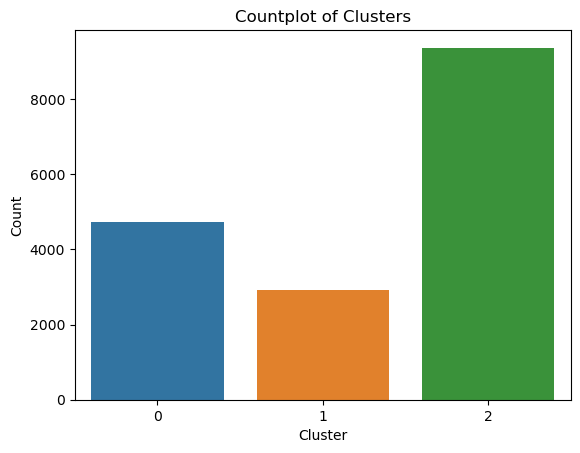

In [51]:
# Create a countplot of the clusters
sns.countplot(data=df, x='Cluster')
plt.title('Countplot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [52]:
# List of age group columns
age_group_columns = ['15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']

# Calculate cluster-wise statistics for each age group
cluster_statistics = df.groupby('Cluster')[age_group_columns].agg(['mean', 'std'])

# Display the cluster-wise statistics
print(cluster_statistics)


               15                  16                  17                  18  \
             mean       std      mean       std      mean       std      mean   
Cluster                                                                         
0        0.482432  0.585183  0.483636  0.573025  0.494782  0.545113  0.472094   
1        1.209889  0.712397  1.081703  0.635359  0.981097  0.556687  0.602030   
2       -0.208510  0.290172 -0.225519  0.307158 -0.261671  0.324809  0.188009   

                         19            ...        45                  46  \
              std      mean       std  ...      mean       std      mean   
Cluster                                ...                                 
0        0.178436  0.531860  0.163441  ...  0.554690  0.306580  0.558930   
1        0.165329  0.631335  0.135797  ...  1.529974  0.468243  1.683829   
2        0.122745  0.234822  0.132556  ... -0.204194  0.135634 -0.179420   

                         47                  48         

In [53]:
# Filter the DataFrame to get countries belonging to Cluster 0
cluster_0_countries = df[df['Cluster'] == 2]

# Get unique country names in Cluster 0
unique_countries = cluster_0_countries['Country-Name'].unique()

# Display unique country names once
for country in unique_countries:
    print(country)


Djibouti
Kenya
Mauritius
Réunion
Rwanda
Seychelles
Zimbabwe
Gabon
Sao Tome and Principe
Algeria
Egypt
Libya
Morocco
Tunisia
Western Sahara
Botswana
Eswatini
Lesotho
Namibia
South Africa
Cabo Verde
Saint Helena
Kazakhstan
Kyrgyzstan
Tajikistan
Turkmenistan
Uzbekistan
China
China, Hong Kong SAR
China, Macao SAR
China, Taiwan Province of China
Dem. People's Republic of Korea
Japan
Mongolia
Republic of Korea
Bangladesh
Bhutan
India
Iran (Islamic Republic of)
Maldives
Nepal
Pakistan
Sri Lanka
Brunei Darussalam
Cambodia
Indonesia
Lao People's Democratic Republic
Malaysia
Myanmar
Philippines
Singapore
Thailand
Timor-Leste
Viet Nam
Armenia
Azerbaijan
Bahrain
Cyprus
Georgia
Iraq
Israel
Jordan
Kuwait
Lebanon
Oman
Qatar
Saudi Arabia
State of Palestine
Syrian Arab Republic
Türkiye
United Arab Emirates
Belarus
Bulgaria
Czechia
Hungary
Poland
Republic of Moldova
Romania
Russian Federation
Slovakia
Ukraine
Denmark
Estonia
Faroe Islands
Finland
Guernsey
Iceland
Ireland
Isle of Man
Jersey
Latvia
Lithua

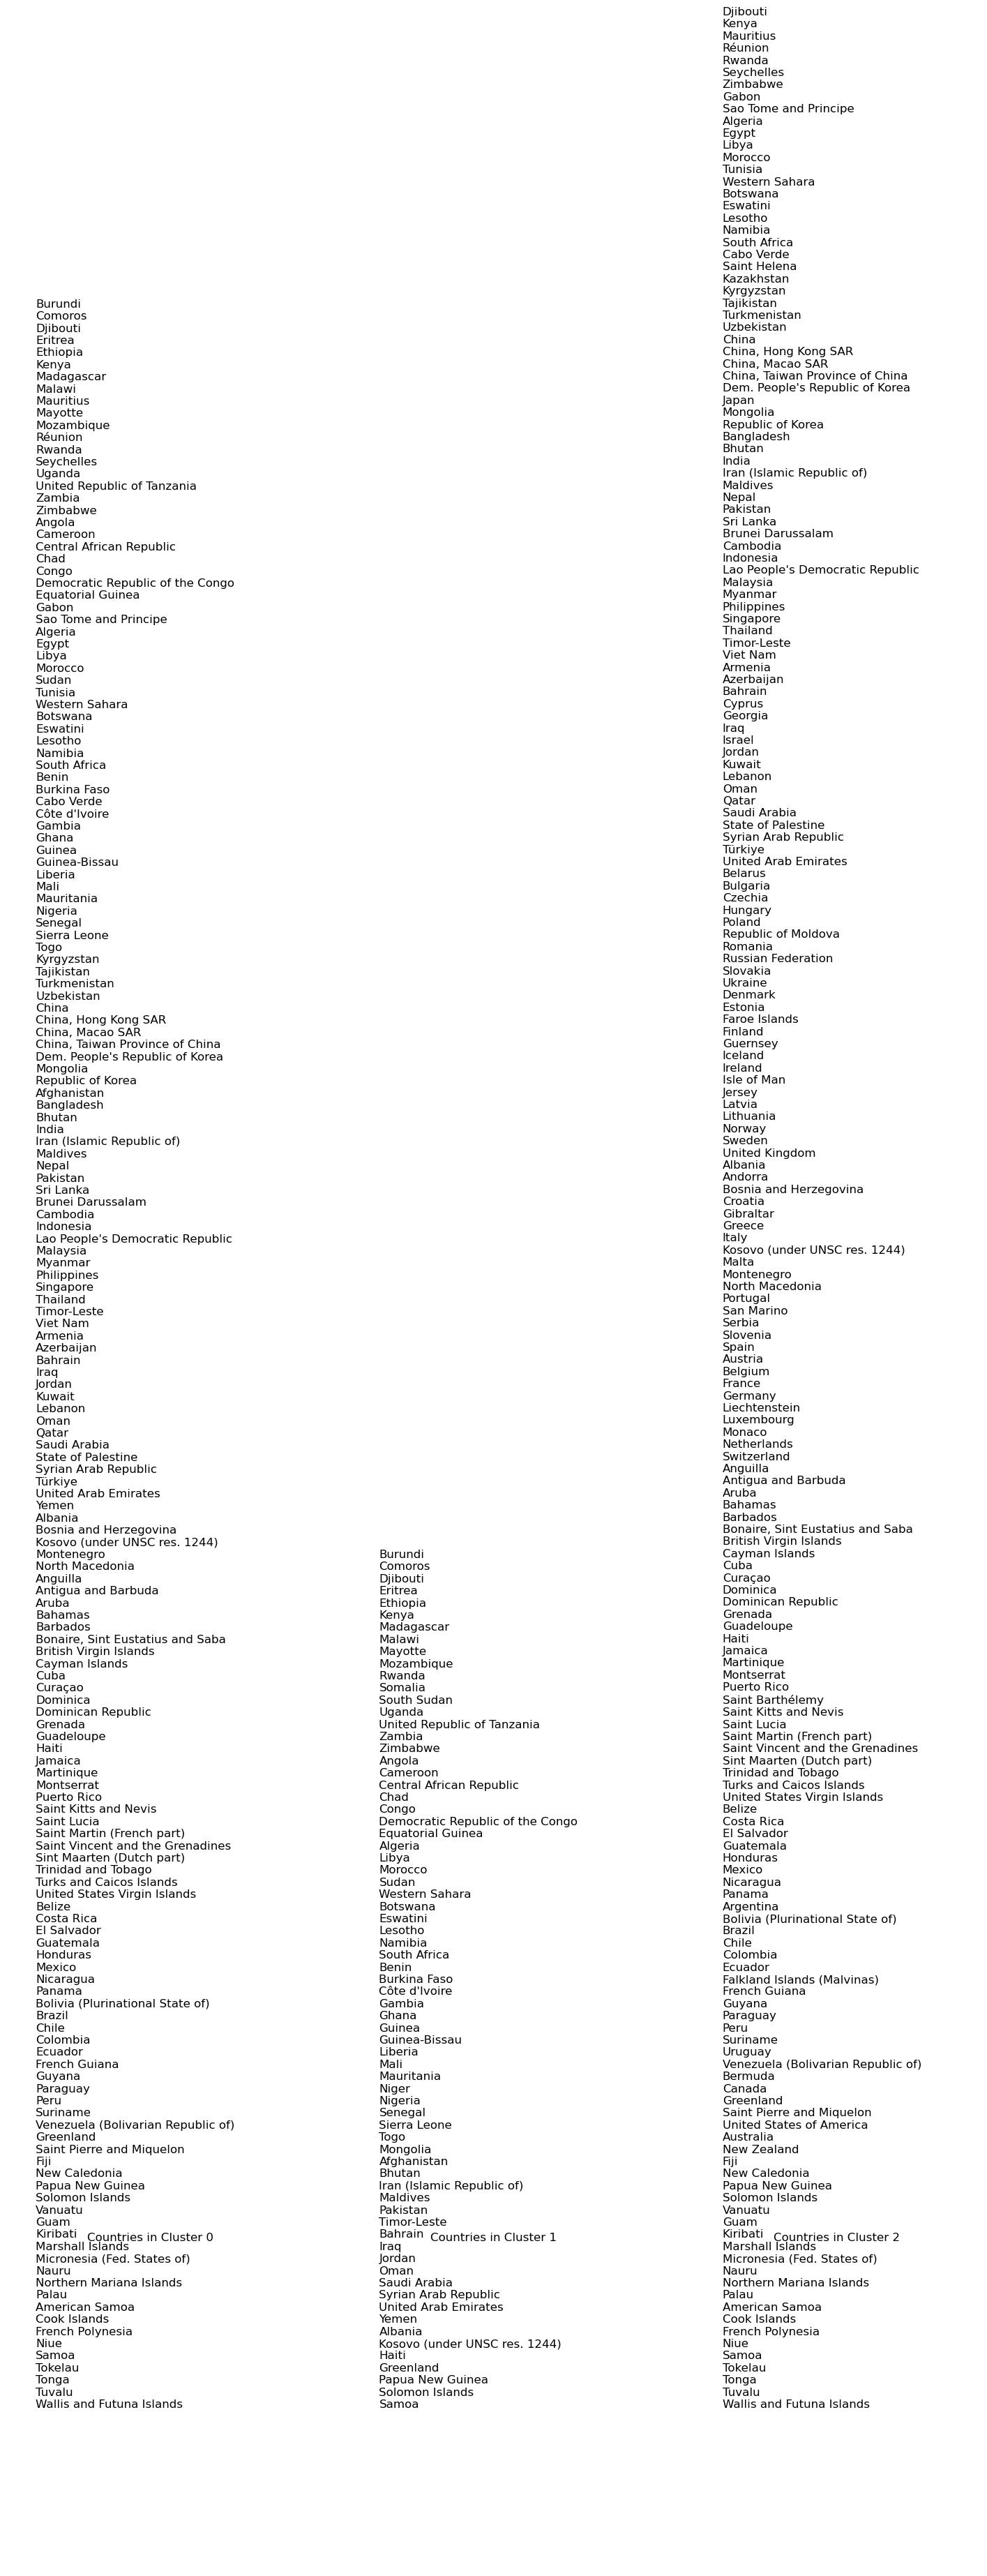

In [54]:
# Define the number of clusters you want to analyze
clusters_to_display = [0, 1, 2]  # You can adjust this list as needed

# Create subplots to display each cluster's countries
fig, axs = plt.subplots(1, len(clusters_to_display), figsize=(18, 6))

for i, cluster_id in enumerate(clusters_to_display):
    # Filter the data to select only the current cluster
    cluster_data = df[df['Cluster'] == cluster_id]

    # Get the list of countries in the current cluster
    countries_in_cluster = cluster_data['Country-Name'].unique()

    # Display the list of countries for the current cluster
    axs[i].set_title(f"Countries in Cluster {cluster_id}")
    axs[i].axis('off')  # Hide axis labels and ticks
    axs[i].text(0.1, 0.5, "\n".join(countries_in_cluster), fontsize=12)

plt.tight_layout()
plt.show()


In [55]:
# Select the columns with age-specific fertility rates (15-49)
age_columns = df[['15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
                  '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
                  '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
                  '45', '46', '47', '48', '49']]

# Calculate the average fertility rate across all age groups
average_fertility_rate = age_columns.mean(axis=1)

# Convert the average fertility rate to children per woman (divide by 1000)
children_per_woman = average_fertility_rate / 1000

# Add the 'Children per Woman' column to your DataFrame
df['Children per Woman'] = children_per_woman

# Display the DataFrame with the new column
print(df[['Country-Name', 'Year', 'Children per Woman']])


                    Country-Name    Year  Children per Woman
1732                     Burundi  1950.0            0.000894
1733                     Burundi  1951.0            0.000890
1734                     Burundi  1952.0            0.000889
1735                     Burundi  1953.0            0.000890
1736                     Burundi  1954.0            0.000890
...                          ...     ...                 ...
20519  Wallis and Futuna Islands  2017.0            0.000042
20520  Wallis and Futuna Islands  2018.0            0.000040
20521  Wallis and Futuna Islands  2019.0            0.000039
20522  Wallis and Futuna Islands  2020.0            0.000037
20523  Wallis and Futuna Islands  2021.0            0.000036

[16992 rows x 3 columns]


In [56]:
# Filter the DataFrame to keep rows with 'Year' between 2000 and the current year
current_year = pd.Timestamp.now().year
df = df[(df['Year'] >= 2000)]

In [57]:
dfg = pd.read_csv('new_gdp-per-capita-worldbank.csv')
dfg.head()

Entity Code  Year  GDP per capita, PPP (constant 2017 international $)
0  Afghanistan  AFG  2002                                          1280.4631  
1  Afghanistan  AFG  2003                                          1292.3335  
2  Afghanistan  AFG  2004                                          1260.0605  
3  Afghanistan  AFG  2005                                          1352.3207  
4  Afghanistan  AFG  2006                                          1366.9932

GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

In [58]:
dfg.rename(columns={"GDP per capita, PPP (constant 2017 international $)": "GDP"}, inplace=True)

In [59]:
dfg.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of Entity      0
Code      444
Year        0
GDP         0
dtype: int64>

In [60]:
dfg.dropna(inplace=True)

In [61]:
dfg.isna().sum()

Entity    0
Code      0
Year      0
GDP       0
dtype: int64

In [62]:
dfg.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5902 entries, 0 to 6345
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  5902 non-null   object 
 1   Code    5902 non-null   object 
 2   Year    5902 non-null   int64  
 3   GDP     5902 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 230.5+ KB


In [63]:
dfg.shape

(5902, 4)

In [64]:
dfg.rename(columns={"Code": "Country-Code"}, inplace=True)
dfg.rename(columns={"Entity": "Country-Name"}, inplace=True)

In [65]:
dfg.columns

Index(['Country-Name', 'Country-Code', 'Year', 'GDP'], dtype='object')

In [66]:
dfg.isnull().sum()

Country-Name    0
Country-Code    0
Year            0
GDP             0
dtype: int64

In [67]:
dfg.isnull().sum().any()

False

In [68]:
# Count the number of duplicate rows in 'df'
num_duplicates = dfg.duplicated().sum()

# Print the number of duplicates
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [69]:
import scipy.stats as stats

print('Null hypothesis H0: The sample has a normal distribution (Gaussian).')
print('Alternative hypothesis H1: The sample does not have a normal distribution (not Gaussian).')

# Specify the column indices you want to test
columns_to_test = dfg.columns[3:]  # Adjust the column range as needed

for col in columns_to_test:
    shapiro_test = stats.shapiro(dfg[col].dropna())  # Remove null values for the Shapiro-Wilk test
    print('For the variable', col, 'with a p-value of', shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print('We cannot reject the null hypothesis, it is Gaussian.')
    else:
        print('We can reject the null hypothesis, it is not Gaussian.')


Null hypothesis H0: The sample has a normal distribution (Gaussian).
Alternative hypothesis H1: The sample does not have a normal distribution (not Gaussian).
For the variable GDP with a p-value of 0.0
We can reject the null hypothesis, it is not Gaussian.


In [70]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

# Select the numeric columns
columns = dfg.columns[3:]  # Adjust the column range as needed

outliers = find_outliers_IQR(dfg[columns])

# Get the number of outliers per column
num_outliers = outliers.sum()

# Get the maximum and minimum outlier values
max_outliers = outliers.max()
min_outliers = outliers.min()

# Print the column names with outliers
columns_with_outliers = num_outliers[num_outliers > 0].index.tolist()
print("Columns with outliers:", columns_with_outliers)

print("Number of outliers:", num_outliers)
print("Maximum outlier values:")
print(max_outliers)
print("Minimum outlier values:")
print(min_outliers)


Columns with outliers: ['GDP']
Number of outliers: GDP    21899270.04
dtype: float64
Maximum outlier values:
GDP    157602.48
dtype: float64
Minimum outlier values:
GDP    60443.918
dtype: float64


In [71]:
from sklearn import preprocessing

# Create a RobustScaler instance
trans = preprocessing.RobustScaler()

# Define columns with outliers
outlier_columns = ['GDP']

# Apply RobustScaler to columns with outliers
dfg[outlier_columns] = trans.fit_transform(dfg[outlier_columns])

# Display the DataFrame
print(dfg.head())


  Country-Name Country-Code  Year       GDP
0  Afghanistan          AFG  2002 -0.403537
1  Afghanistan          AFG  2003 -0.403015
2  Afghanistan          AFG  2004 -0.404436
3  Afghanistan          AFG  2005 -0.400373
4  Afghanistan          AFG  2006 -0.399727


In [72]:
dfg.head()

Country-Name Country-Code  Year       GDP
0  Afghanistan          AFG  2002 -0.403537
1  Afghanistan          AFG  2003 -0.403015
2  Afghanistan          AFG  2004 -0.404436
3  Afghanistan          AFG  2005 -0.400373
4  Afghanistan          AFG  2006 -0.399727

In [73]:
# Filter the DataFrame to keep rows with 'Year' between 2000 and the current year
current_year = pd.Timestamp.now().year
dfg = dfg[(dfg['Year'] >= 2000)]

In [74]:
dfg.shape

(4194, 4)

In [75]:
dfg.shape

(4194, 4)

In [76]:
df.isnull().sum().any()

False

In [77]:
combined_df = pd.merge(df, dfg, on=["Country-Code", "Year", "Country-Name"])



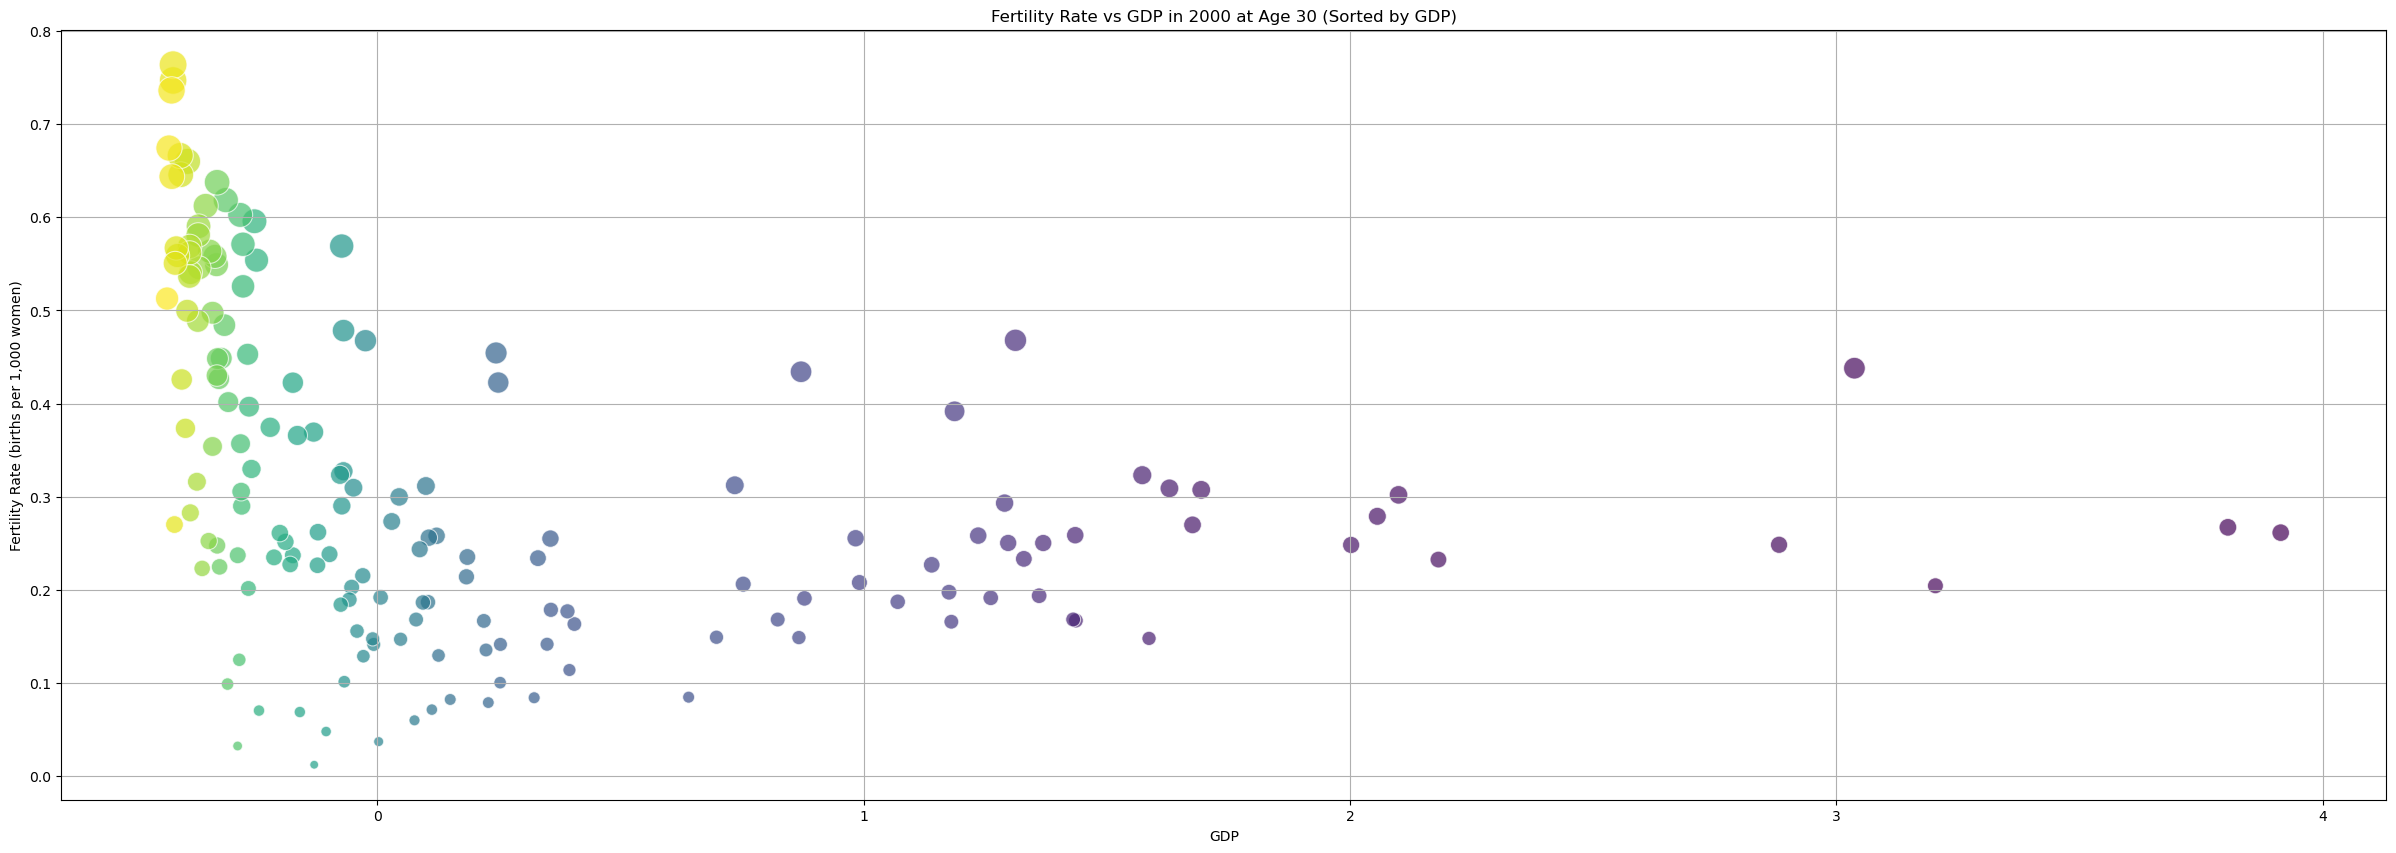

In [78]:
# Filter the DataFrame for the year 2020 and age 30
year = 2000
age_column_name = '30'  # Replace with the actual column name for age 30
gdp_column_name = 'GDP'  # Replace with the actual name of your GDP column

filtered_data = combined_df[(combined_df['Year'] == year)]

# Sort the data by GDP in descending order
filtered_data = filtered_data.sort_values(by=gdp_column_name, ascending=False)

# Create a scatter plot for Fertility Rate vs GDP using Seaborn
plt.figure(figsize=(30, 10))
sns.scatterplot(data=filtered_data, x=gdp_column_name, y=age_column_name, hue='Country-Name', size=age_column_name,
                sizes=(40, 400), palette='viridis', alpha=0.7, legend=False)

plt.xlabel('GDP')
plt.ylabel('Fertility Rate (births per 1,000 women)')
plt.title(f'Fertility Rate vs GDP in {year} at Age 30 (Sorted by GDP)')
plt.grid(True)
plt.show()


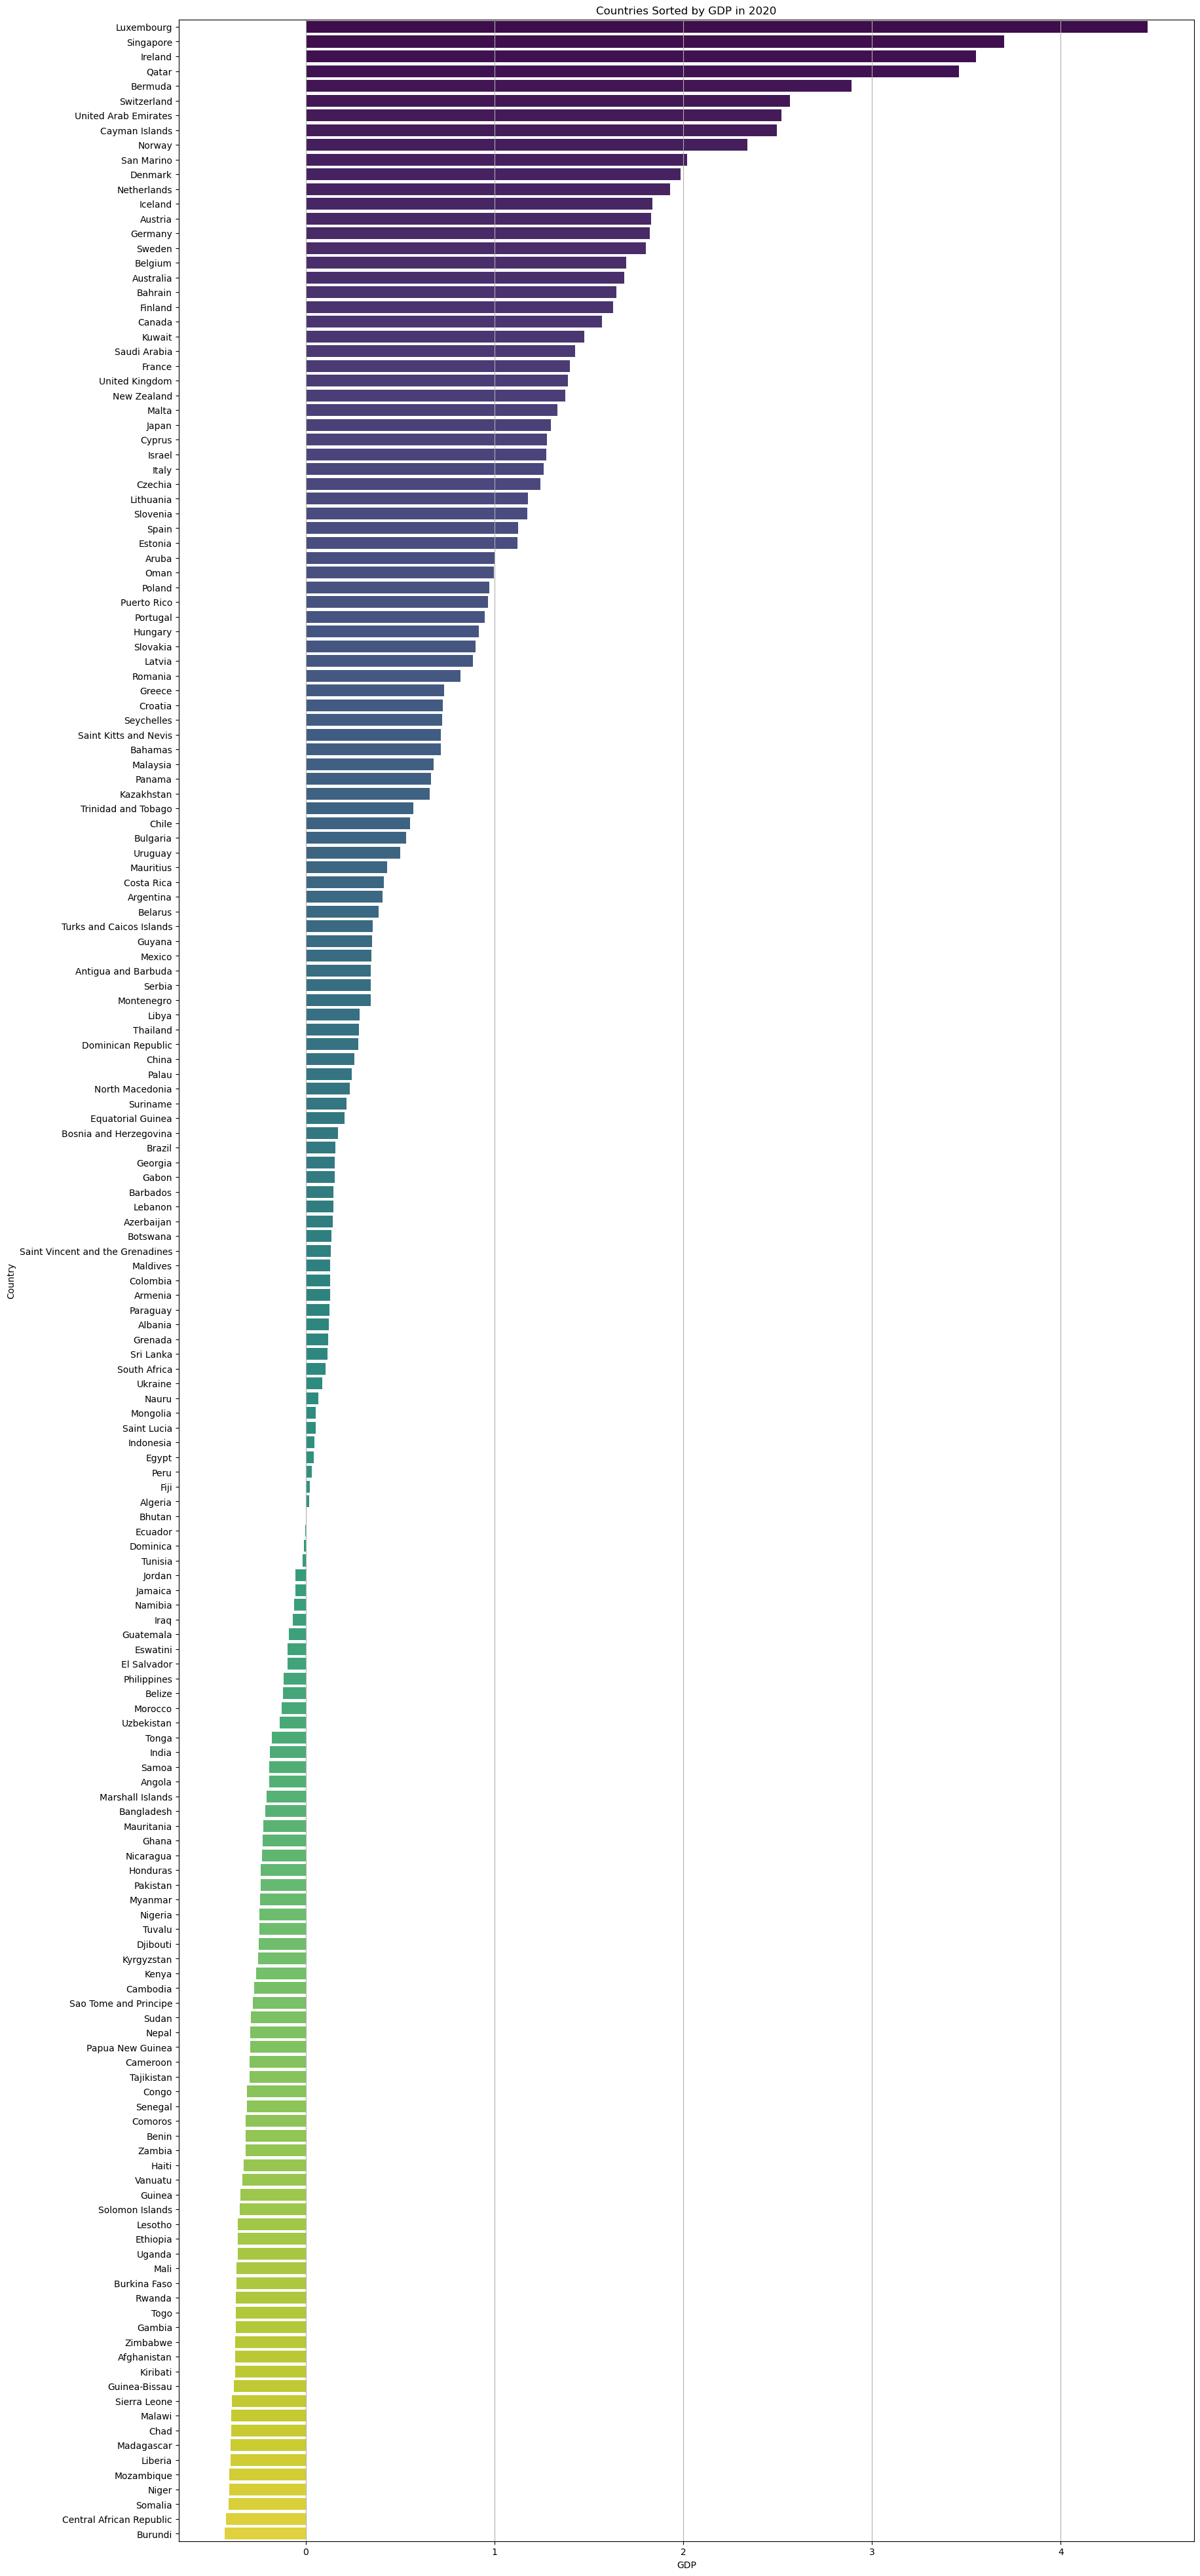

In [79]:
# Filter the DataFrame for the year 2020 and age 30
year = 2020
age_column_name = '30'  # Replace with the actual column name for age 30
gdp_column_name = 'GDP'  # Replace with the actual name of your GDP column

filtered_data = combined_df[(combined_df['Year'] == year)]

# Sort the data by GDP in descending order
filtered_data = filtered_data.sort_values(by=gdp_column_name, ascending=False)

# Create a bar chart to show countries sorted by GDP
plt.figure(figsize=(20, 50))
sns.barplot(data=filtered_data, x=gdp_column_name, y='Country-Name', palette='viridis')

plt.xlabel('GDP')
plt.ylabel('Country')
plt.title(f'Countries Sorted by GDP in {year}')
plt.grid(axis='x')
plt.show()


In [80]:
# Filter the DataFrame for the year 2020 and age 30
year = 2020
age_column_name = '30'  # Replace with the actual column name for age 30
gdp_column_name = 'GDP'  # Replace with the actual name of your GDP column

filtered_data = combined_df[(combined_df['Year'] == year)]

# Sort the data by GDP in descending order
filtered_data = filtered_data.sort_values(by=gdp_column_name, ascending=False)

# Display the filtered data in a table
filtered_data[['Country-Name', age_column_name, gdp_column_name]]


Country-Name        30       GDP
2627                Luxembourg  0.180028  4.461621
1507                 Singapore  0.147999  3.702117
2122                   Ireland  0.231497  3.552122
1792                     Qatar  0.203183  3.460488
3434                   Bermuda  0.120601  2.892314
...                        ...       ...       ...
183                 Mozambique  0.395718 -0.405628
939                      Niger  0.660436 -0.406440
236                    Somalia  0.704501 -0.410277
368   Central African Republic  0.551149 -0.422593
20                     Burundi  0.569424 -0.428601

[171 rows x 3 columns]

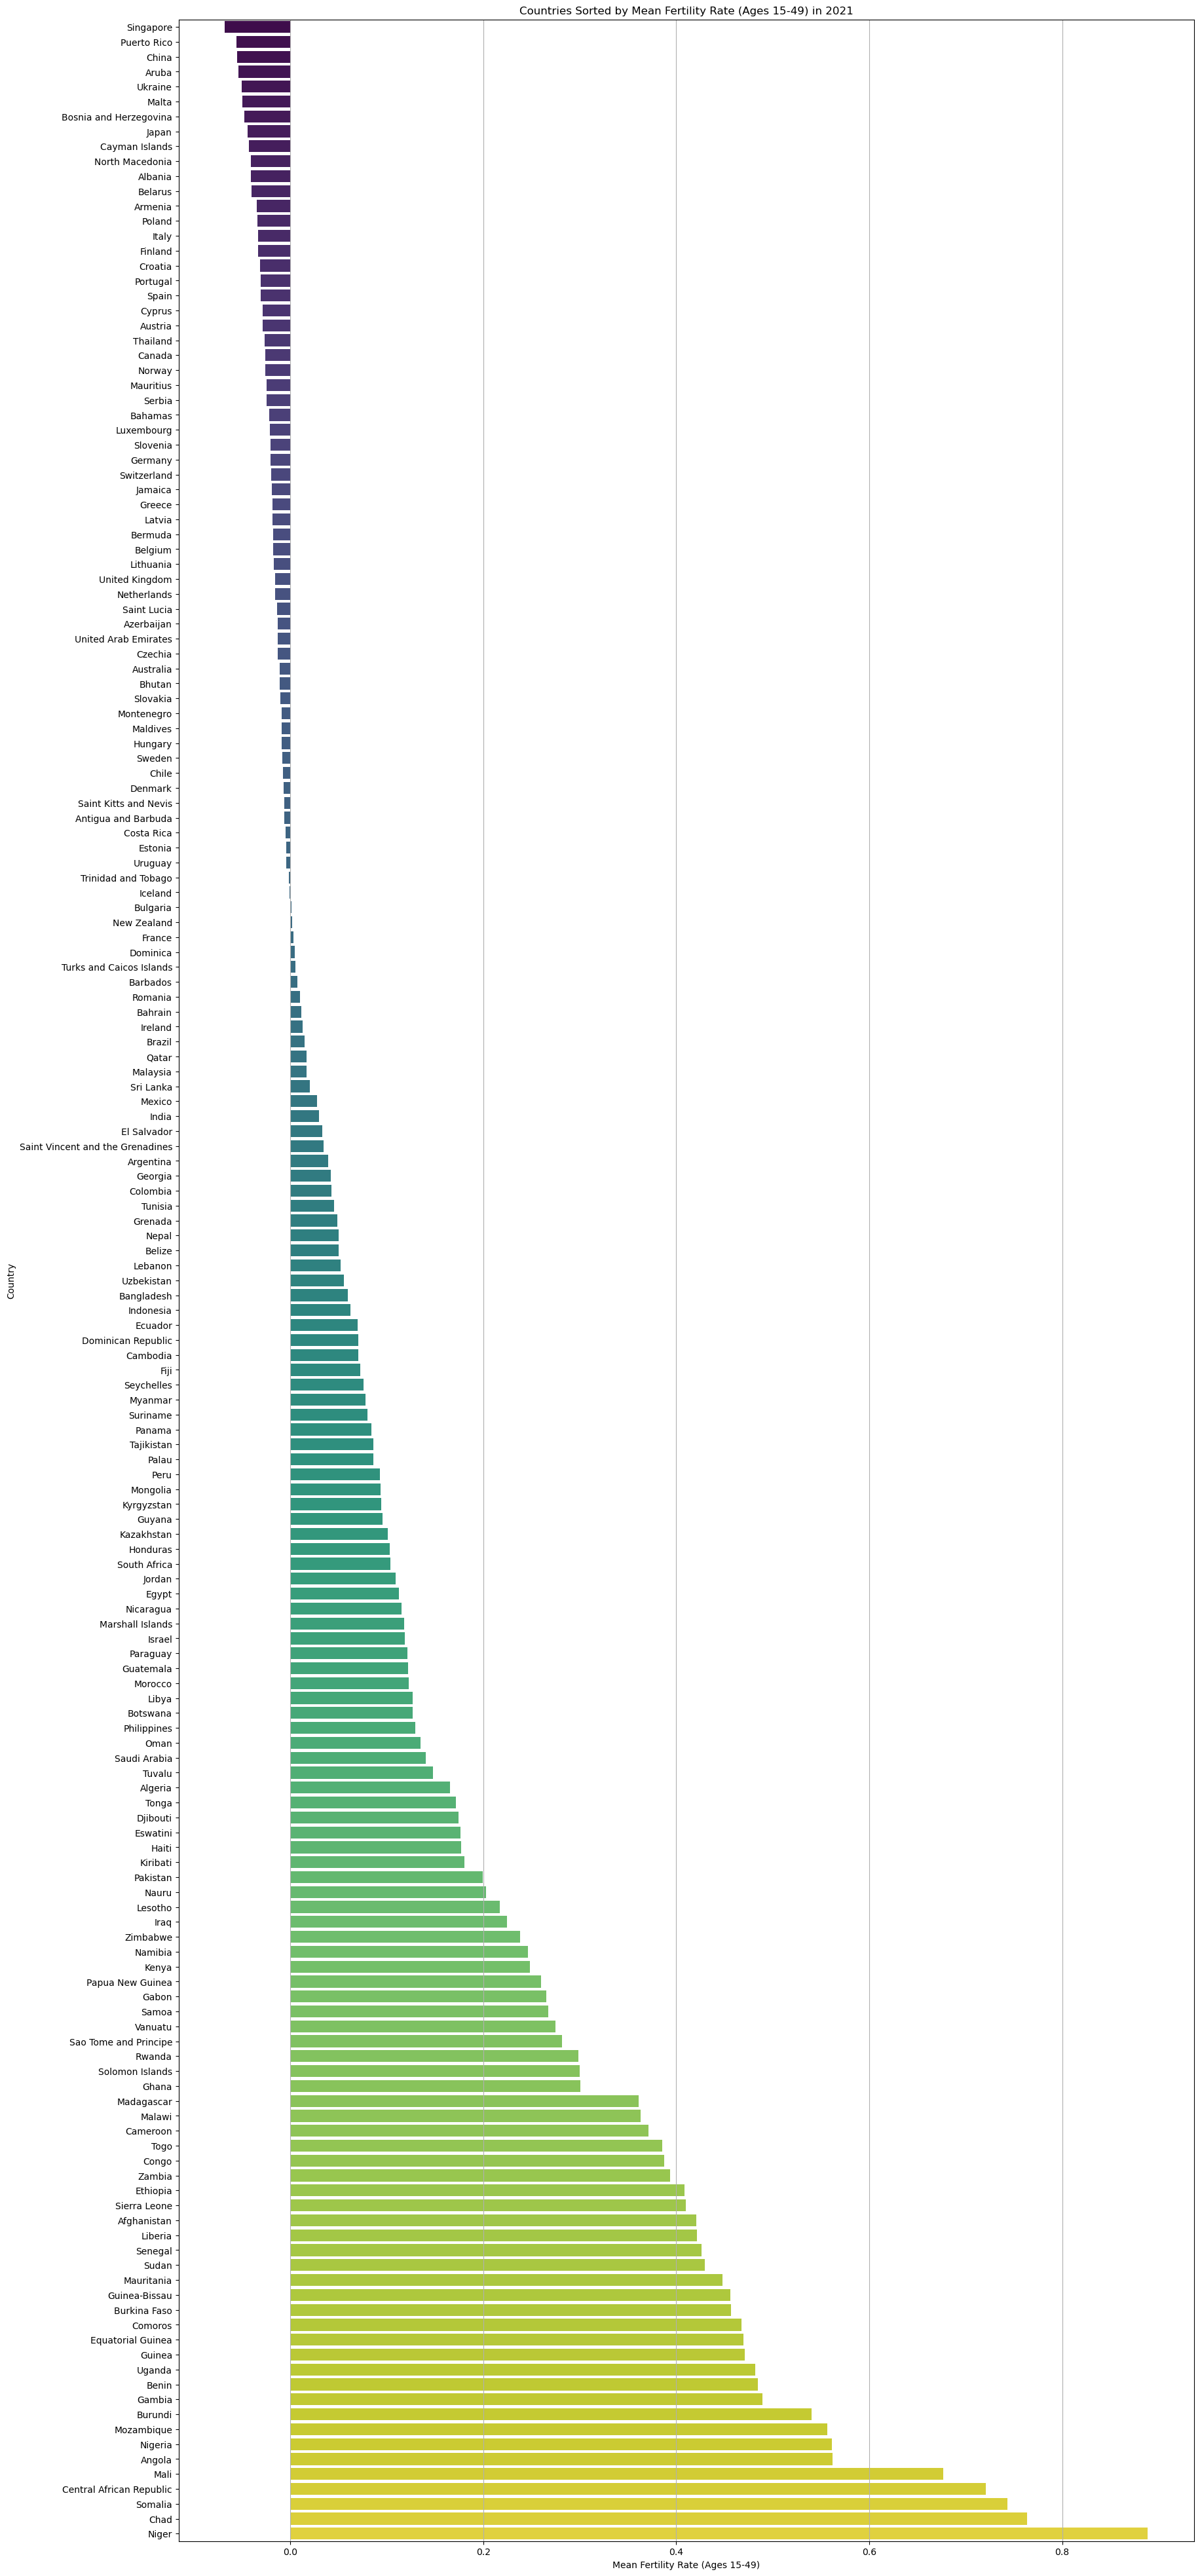

In [81]:
# Filter the DataFrame for the year 2020
year = 2021
gdp_column_name = 'Country-Name'  # Replace with the actual name of your GDP column

filtered_data = combined_df[(combined_df['Year'] == year)]

# Calculate the mean fertility rate across all ages from 15 to 49
filtered_data['Mean_Fertility_Rate'] = filtered_data[['15', '16', '17', '18', '19',
                                                      '20', '21', '22', '23', '24',
                                                      '25', '26', '27', '28', '29',
                                                      '30', '31', '32', '33', '34',
                                                      '35', '36', '37', '38', '39',
                                                      '40', '41', '42', '43', '44',
                                                      '45', '46', '47', '48', '49']].mean(axis=1)

# Sort the data by the mean fertility rate in ascending order
filtered_data = filtered_data.sort_values(by='Mean_Fertility_Rate', ascending=True)

# Create a bar chart to show countries sorted by mean fertility rate across all ages from 15 to 49
plt.figure(figsize=(20, 50))
sns.barplot(data=filtered_data, x='Mean_Fertility_Rate', y=gdp_column_name, palette='viridis')

plt.xlabel('Mean Fertility Rate (Ages 15-49)')
plt.ylabel('Country')
plt.title(f'Countries Sorted by Mean Fertility Rate (Ages 15-49) in {year}')
plt.grid(axis='x')
plt.show()


In [82]:
# Filter the DataFrame for the year 2021
year = 2021

# Assuming your columns are named from '15' to '49', replace these with the actual column names if needed
age_columns = [str(age) for age in range(15, 50)]

filtered_data = combined_df[(combined_df['Year'] == year)]

# Calculate the mean fertility rate across all ages from 15 to 49
filtered_data['Mean_Fertility_Rate'] = filtered_data[age_columns].mean(axis=1)

# Sort the data by the mean fertility rate in ascending order
filtered_data = filtered_data.sort_values(by='Mean_Fertility_Rate', ascending=True)

# Display the sorted data as a table
print(filtered_data[['Country-Name', 'Mean_Fertility_Rate']])


                  Country-Name  Mean_Fertility_Rate
1508                 Singapore            -0.067808
2908               Puerto Rico            -0.055952
1158                     China            -0.055002
2716                     Aruba            -0.053726
2013                   Ukraine            -0.050522
...                        ...                  ...
896                       Mali             0.676765
369   Central African Republic             0.720943
237                    Somalia             0.742975
391                       Chad             0.763637
940                      Niger             0.888797

[169 rows x 2 columns]


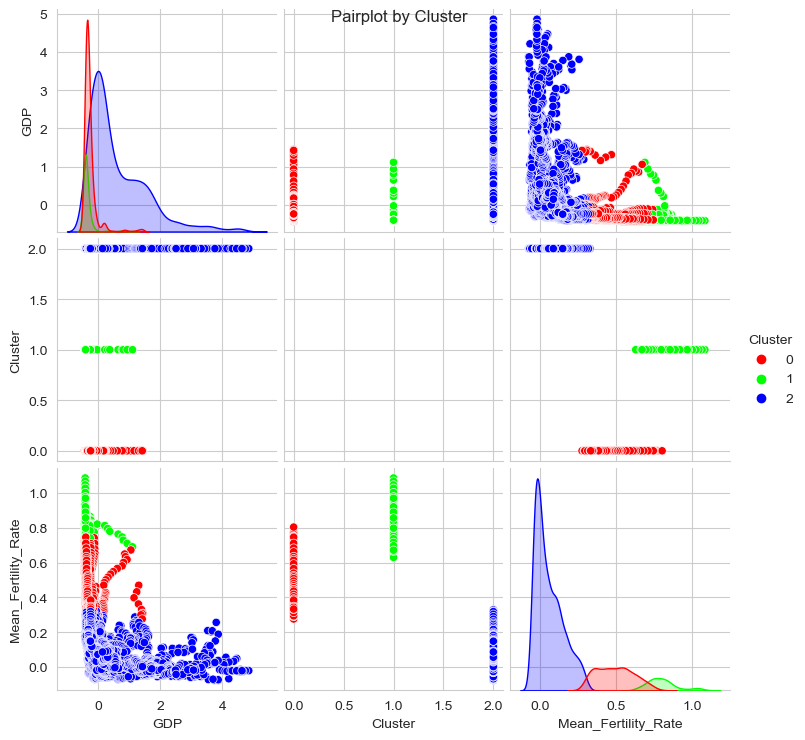

In [83]:
# Set the style for the pairplot
sns.set_style("whitegrid")

# Define a custom color palette for cluster colors
custom_palette = ["#FF0000", "#00FF00", "#0000FF"]  # Replace with your desired colors

# Create a pairplot colored by cluster with a custom palette
sns.pairplot(data=combined_df, hue='Cluster', vars=['GDP', 'Cluster', 'Mean_Fertility_Rate'], palette=custom_palette)
plt.suptitle('Pairplot by Cluster')
plt.show()


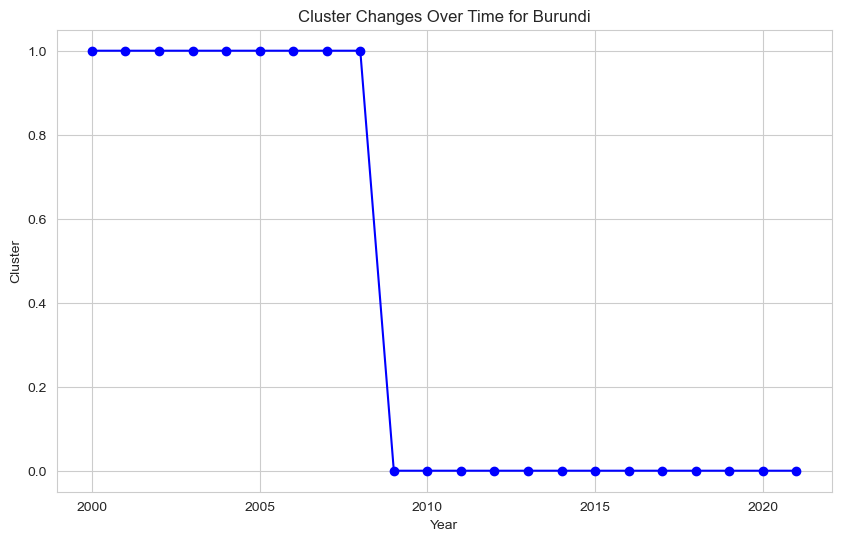

In [84]:
country_of_interest = 'Burundi'
country_data = df[df['Country-Name'] == country_of_interest]
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['Cluster'], marker='o', linestyle='-', color='b')
plt.title(f'Cluster Changes Over Time for {country_of_interest}')
plt.xlabel('Year')
plt.ylabel('Cluster')
plt.grid(True)
plt.show()


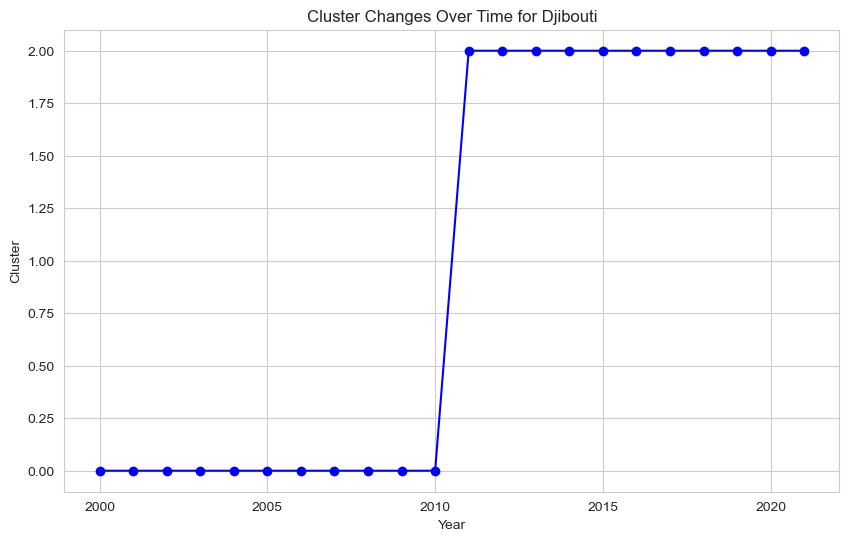

In [85]:
country_of_interest = 'Djibouti'
country_data = df[df['Country-Name'] == country_of_interest]
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['Cluster'], marker='o', linestyle='-', color='b')
plt.title(f'Cluster Changes Over Time for {country_of_interest}')
plt.xlabel('Year')
plt.ylabel('Cluster')
plt.grid(True)
plt.show()


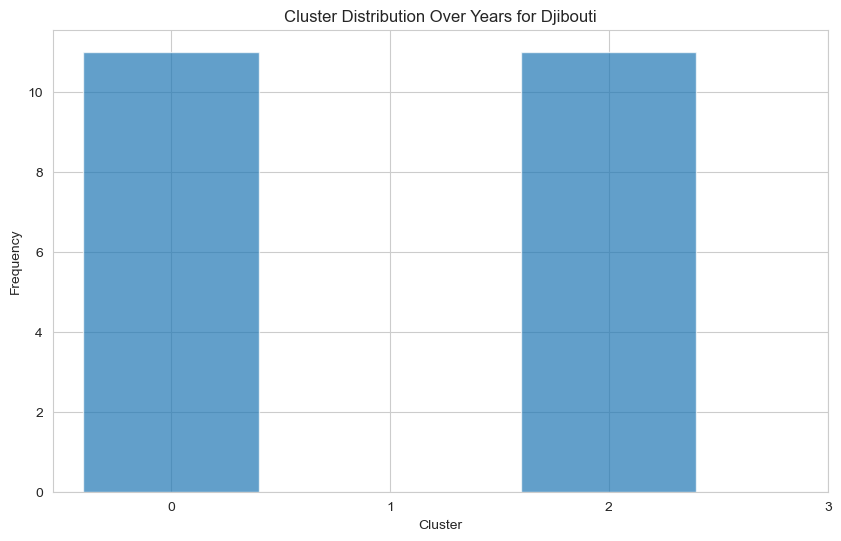

In [86]:
# Choose the country you want to visualize (e.g., 'Chad')
country_of_interest = 'Djibouti'

# Filter the data for the selected country
country_data = df[df['Country-Name'] == country_of_interest]

# Group the data by year and calculate the average cluster assignment for each year
average_clusters = country_data.groupby('Year')['Cluster'].mean()

# Create a histogram to visualize the distribution of cluster assignments
plt.figure(figsize=(10, 6))
plt.hist(average_clusters, bins=range(4), align='left', rwidth=0.8, alpha=0.7)
plt.xticks(range(4))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title(f'Cluster Distribution Over Years for {country_of_interest}')
plt.grid(True)
plt.show()


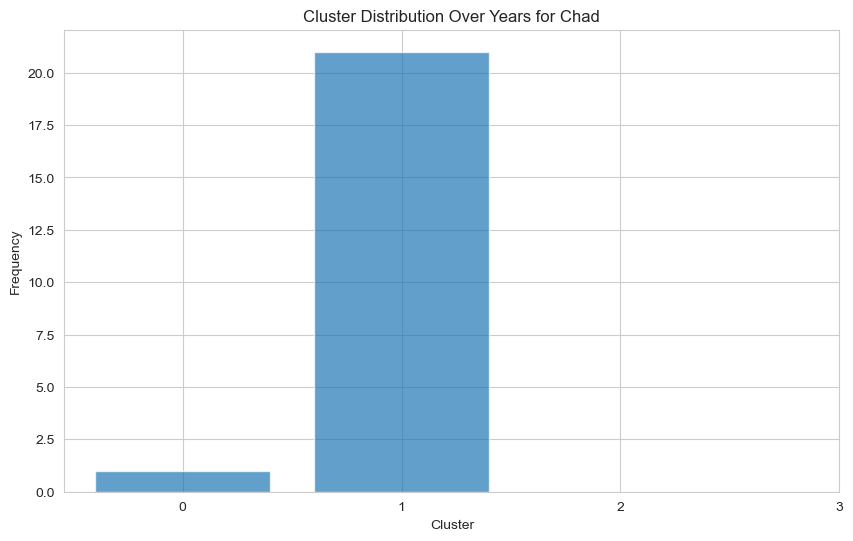

In [87]:
# Choose the country you want to visualize (e.g., 'Chad')
country_of_interest = 'Chad'

# Filter the data for the selected country
country_data = df[df['Country-Name'] == country_of_interest]

# Group the data by year and calculate the average cluster assignment for each year
average_clusters = country_data.groupby('Year')['Cluster'].mean()

# Create a histogram to visualize the distribution of cluster assignments
plt.figure(figsize=(10, 6))
plt.hist(average_clusters, bins=range(4), align='left', rwidth=0.8, alpha=0.7)
plt.xticks(range(4))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title(f'Cluster Distribution Over Years for {country_of_interest}')
plt.grid(True)
plt.show()


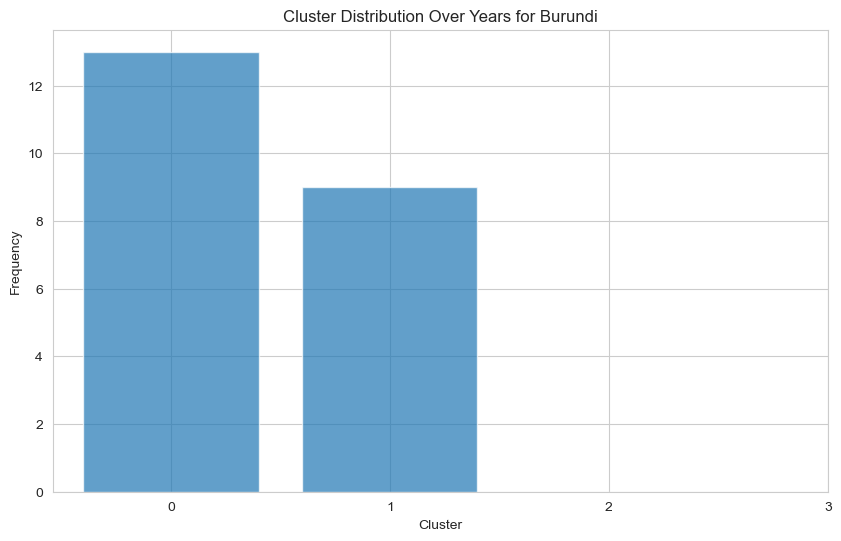

In [88]:
# Choose the country you want to visualize (e.g., 'Chad')
country_of_interest = 'Burundi'

# Filter the data for the selected country
country_data = df[df['Country-Name'] == country_of_interest]

# Group the data by year and calculate the average cluster assignment for each year
average_clusters = country_data.groupby('Year')['Cluster'].mean()

# Create a histogram to visualize the distribution of cluster assignments
plt.figure(figsize=(10, 6))
plt.hist(average_clusters, bins=range(4), align='left', rwidth=0.8, alpha=0.7)
plt.xticks(range(4))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title(f'Cluster Distribution Over Years for {country_of_interest}')
plt.grid(True)
plt.show()


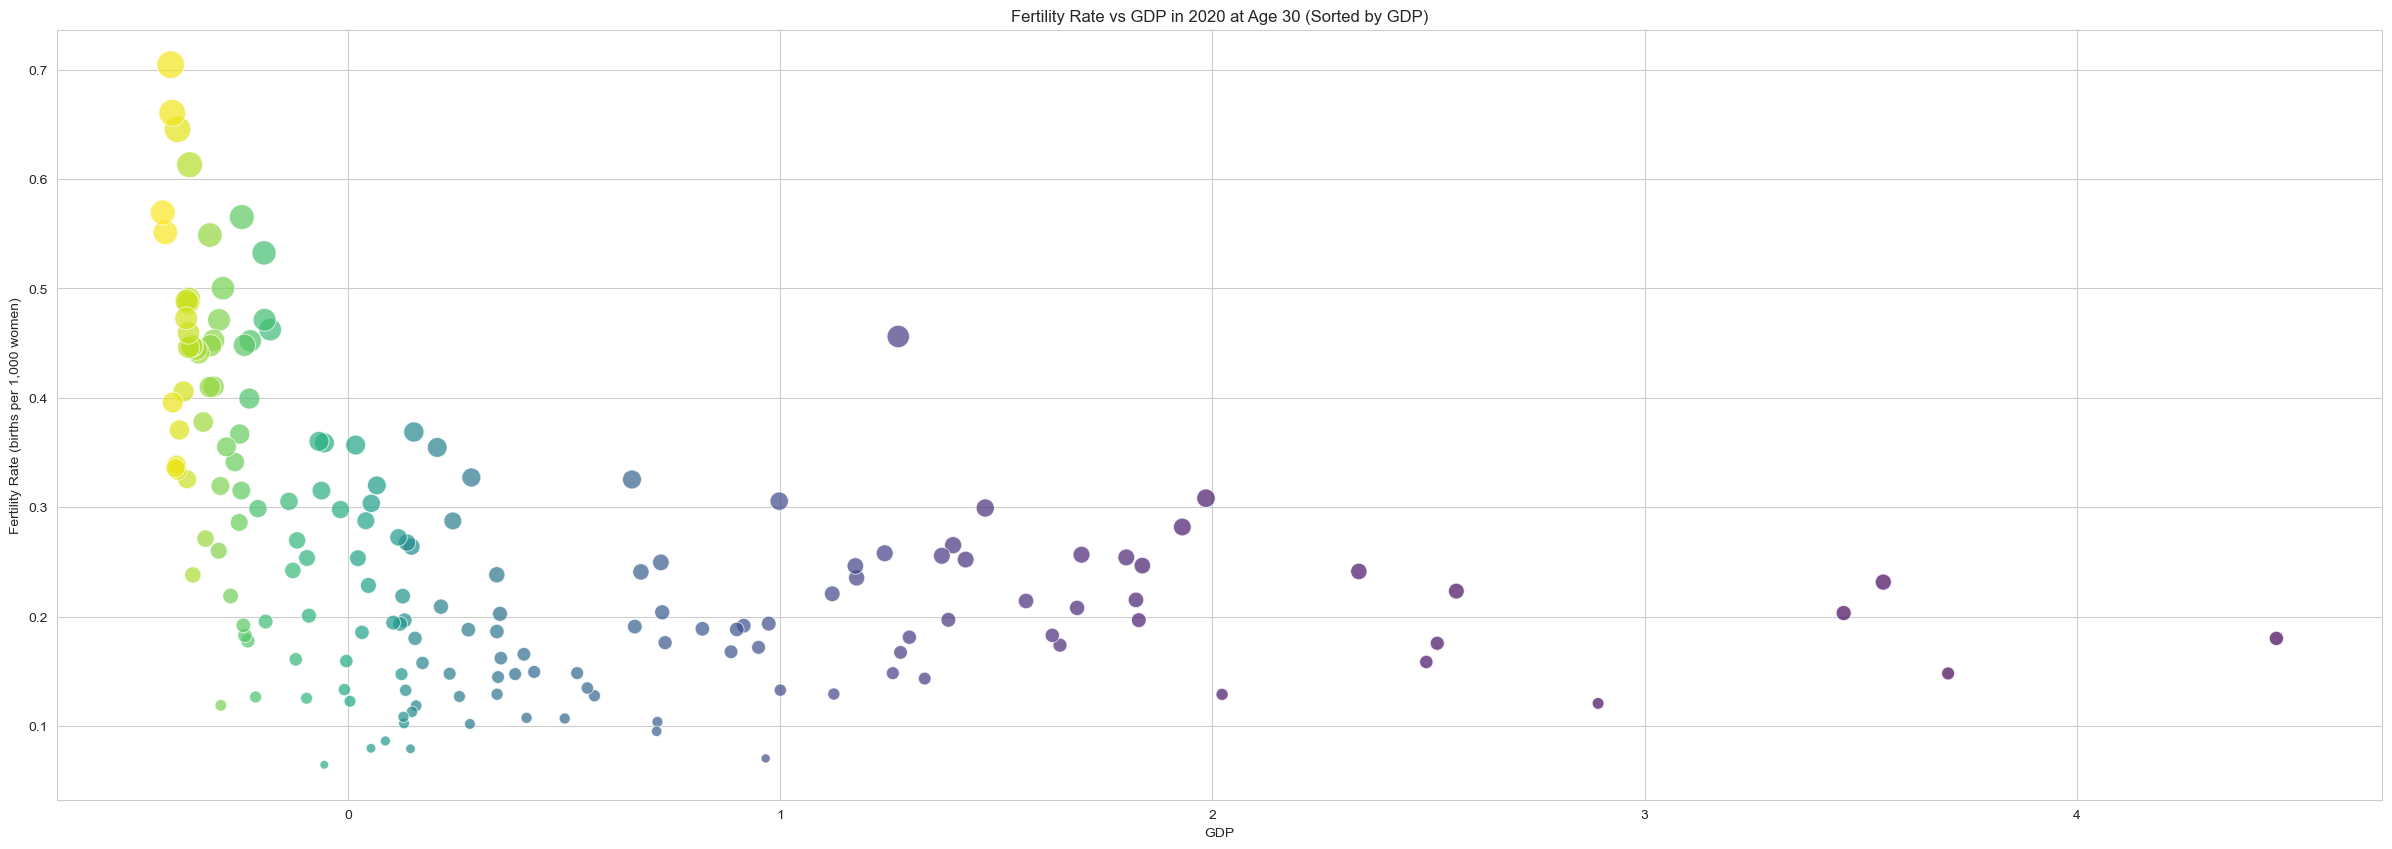

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for the year 2020 and age 30
year = 2020
age_column_name = '30'  # Replace with the actual column name for age 30
gdp_column_name = 'GDP'  # Replace with the actual name of your GDP column

filtered_data = combined_df[(combined_df['Year'] == year)]

# Sort the data by GDP in descending order
filtered_data = filtered_data.sort_values(by=gdp_column_name, ascending=False)

# Create a scatter plot for Fertility Rate vs GDP using Seaborn
plt.figure(figsize=(30, 10))
sns.scatterplot(data=filtered_data, x=gdp_column_name, y=age_column_name, hue='Country-Name', size=age_column_name,
                sizes=(40, 400), palette='viridis', alpha=0.7, legend=False)

plt.xlabel('GDP')
plt.ylabel('Fertility Rate (births per 1,000 women)')
plt.title(f'Fertility Rate vs GDP in {year} at Age 30 (Sorted by GDP)')
plt.grid(True)
plt.show()
